<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('dark_background') #Use Dark Background Theme

pd.options.display.max_columns = None# to show max column

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# view the data
house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1233,1234,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000
1409,1410,60,RL,46.0,20544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,6,1986,1991,Gable,CompShg,Plywood,Plywood,BrkFace,123.0,TA,Gd,CBlock,Gd,TA,No,Unf,0,Unf,0,791,791,GasA,Gd,Y,SBrkr,1236,857,0,2093,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1986.0,Fin,2,542,TA,TA,Y,364,63,0,0,0,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,215000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2009,2009,Hip,CompShg,CemntBd,CmentBd,BrkFace,305.0,Ex,TA,CBlock,Ex,TA,No,GLQ,1436,Unf,0,570,2006,GasA,Ex,Y,SBrkr,2020,0,0,2020,1,0,2,1,3,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,900,TA,TA,Y,156,54,0,0,0,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
1290,1291,80,RL,NaN,14112,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,7,1964,1964,Hip,CompShg,Wd Sdng,HdBoard,BrkFace,86.0,TA,TA,PConc,TA,TA,Av,GLQ,1014,Unf,0,138,1152,GasA,TA,Y,SBrkr,1152,0,0,1152,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1964.0,RFn,2,484,TA,TA,Y,227,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180500


In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.shape

(1460, 81)

In [7]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [8]:
# Whole lot of null values...
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
#find out unique values in each column
# look at the MSzoning (5 zones)
for item in house:
    print item
    print house[item].nunique()

Id
1460
MSSubClass
15
MSZoning
5
LotFrontage
110
LotArea
1073
Street
2
Alley
2
LotShape
4
LandContour
4
Utilities
2
LotConfig
5
LandSlope
3
Neighborhood
25
Condition1
9
Condition2
8
BldgType
5
HouseStyle
8
OverallQual
10
OverallCond
9
YearBuilt
112
YearRemodAdd
61
RoofStyle
6
RoofMatl
8
Exterior1st
15
Exterior2nd
16
MasVnrType
4
MasVnrArea
327
ExterQual
4
ExterCond
5
Foundation
6
BsmtQual
4
BsmtCond
4
BsmtExposure
4
BsmtFinType1
6
BsmtFinSF1
637
BsmtFinType2
6
BsmtFinSF2
144
BsmtUnfSF
780
TotalBsmtSF
721
Heating
6
HeatingQC
5
CentralAir
2
Electrical
5
1stFlrSF
753
2ndFlrSF
417
LowQualFinSF
24
GrLivArea
861
BsmtFullBath
4
BsmtHalfBath
3
FullBath
4
HalfBath
3
BedroomAbvGr
8
KitchenAbvGr
4
KitchenQual
4
TotRmsAbvGrd
12
Functional
7
Fireplaces
4
FireplaceQu
5
GarageType
6
GarageYrBlt
97
GarageFinish
3
GarageCars
5
GarageArea
441
GarageQual
5
GarageCond
5
PavedDrive
3
WoodDeckSF
274
OpenPorchSF
202
EnclosedPorch
120
3SsnPorch
20
ScreenPorch
76
PoolArea
8
PoolQC
3
Fence
4
MiscFeature
4
MiscV

In [10]:
house['MSZoning'].nunique()

5

In [11]:
house['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [12]:
# there's house ID, run check to see if there are any duplicate IDs
len(house.Id) == len(set(house.Id))

# Since it's true, there are no duplicated IDs

True

In [13]:
# column id can be safely dropped
house.drop("Id", axis = 1, inplace = True)

In [14]:
# Found 3 columns for possible use of train/test set. For simplicity sake, yearbuilt will be used
# The 3 variables: YearBuilt, TotalBsmtSF, GrLivArea

In [15]:
print house['YearBuilt'].describe()
house['YearBuilt'].value_counts()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

## Dealing with missing values
solving the missing values before deviding the df to train and test set 
the df will be duplicated just in case.

In [16]:
# Duplicated the DF
# Previous I dropped the row with the null values, it affected the calculation a lot..
# Be more cautious on how many rows to drop
houseCopy=house.copy()

In [17]:
total = houseCopy.isnull().sum().sort_values(ascending=False)
percent = (houseCopy.isnull().sum()/houseCopy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [18]:
# Choose to drop only the electrical row
houseCopy.drop(houseCopy['Electrical'][houseCopy.Electrical.isnull()].index[0], inplace=True)

In [19]:
# Replace all categorical NaN with 'None'
categories = ['BsmtExposure',
              'BsmtFinType1',
              'BsmtFinType2',
              'BsmtCond', 
              'BsmtQual',
              'MasVnrType', 
              'GarageCond',
              'GarageFinish',
              'GarageQual',
              'GarageType',
              'GarageYrBlt',
              'MiscFeature',
              'FireplaceQu',
              'Fence',
              'PoolQC',
              'Alley']
# This method using replace didn't work
# houseCopy[categories] = houseCopy[categories].replace(np.nan, 'None', inplace = True)   

In [20]:
for item in categories:
    houseCopy.loc[:, item] = house.loc[:, item].fillna("None")

In [21]:
houseCopy.shape

(1459, 80)

In [22]:
# Dealing with 2 variables that will not be string value
# Replace with mean
meanvnr = houseCopy['MasVnrArea'].mean()
houseCopy['MasVnrArea'].fillna(meanvnr, inplace=True)
meanlot = houseCopy['LotFrontage'].mean()
houseCopy['LotFrontage'].fillna(meanlot, inplace=True)

In [23]:
# Check if there is any missing value
total = houseCopy.isnull().sum().sort_values(ascending=False)
percent = (houseCopy.isnull().sum()/houseCopy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

print 'There are {} null values.'.format(houseCopy.isnull().sum().max())

There are 0 null values.


## More clean up (Creating dummy variables)
Re-read the question, decided to only keep only the residential rows

In [24]:
houseCopy['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [25]:
residentHouse=houseCopy[houseCopy.MSZoning.isin(['RL','FV', 'RH','RM'])]

In [26]:
residentHouse.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1012,70,RL,55.0000,10592,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1923,1996,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,Fa,No,Unf,0,Unf,0,602,602,GasA,TA,Y,SBrkr,900,602,0,1502,0,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1923,Unf,1,180,TA,TA,Y,96,0,112,0,53,0,None,None,None,0,8,2007,WD,Normal,165000
1403,20,RL,49.0000,15256,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,84.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,929,Unf,0,556,1485,GasA,Ex,Y,SBrkr,1464,0,0,1464,1,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007,Unf,3,754,TA,TA,Y,168,160,0,0,0,0,None,None,None,0,8,2007,WD,Normal,282922
337,20,RL,70.0000,9135,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,113.0,Gd,TA,PConc,Gd,TA,Av,GLQ,810,Unf,0,726,1536,GasA,Ex,Y,SBrkr,1536,0,0,1536,1,0,2,0,3,1,Gd,7,Typ,0,None,Attchd,2002,RFn,2,532,TA,TA,Y,192,74,0,0,0,0,None,None,None,0,12,2008,WD,Normal,214000
1023,120,RL,43.0000,3182,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005,Fin,2,437,TA,TA,Y,156,20,0,0,0,0,None,None,None,0,5,2008,WD,Normal,191000
641,60,FV,70.0475,7050,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,738,Unf,0,319,1057,GasA,Ex,Y,SBrkr,1057,872,0,1929,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001,Fin,2,650,TA,TA,Y,0,235,0,0,0,0,None,None,None,0,5,2007,WD,Normal,226000


In [27]:
dummy_columns = ['MSZoning',
                 'Street',
                 'Alley',
                 'LotShape',
                 'Electrical',
                 'LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 
                 'Condition1', 'Condition2', 'BldgType','HouseStyle',
                  'Foundation','GarageType'
                ]
house_dummies = pd.get_dummies(residentHouse[dummy_columns])

In [28]:
residentHouseDummy = residentHouse.join(house_dummies)

# Drop the actual columns# Drop t 
residentHouseDummy = residentHouse.drop(dummy_columns, axis=1)

In [29]:
residentHouseDummy.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
434,180,21.0,1890,4,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,Gd,TA,Av,ALQ,495,Unf,0,135,630,GasA,Gd,Y,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,None,None,None,0,0,None,None,Y,88,0,0,0,0,0,None,None,None,0,6,2008,WD,Normal,81000
1425,20,80.0,10721,6,6,1959,1959,Hip,CompShg,HdBoard,HdBoard,Stone,243.0,Gd,TA,TA,TA,No,Unf,0,Unf,0,1252,1252,GasA,Ex,Y,1252,0,0,1252,0,0,1,0,3,1,Gd,7,Typ,0,None,1960,Unf,2,528,TA,TA,Y,0,39,0,0,0,0,None,None,None,0,10,2008,WD,Normal,142000
1228,120,65.0,8769,9,5,2008,2008,Hip,CompShg,MetalSd,MetalSd,BrkFace,766.0,Ex,TA,Ex,TA,No,GLQ,1540,Unf,0,162,1702,GasA,Ex,Y,1702,0,0,1702,1,0,1,1,1,1,Ex,7,Typ,1,Gd,2008,Fin,3,1052,TA,TA,Y,0,72,0,0,224,0,None,None,None,0,10,2008,New,Partial,367294
200,20,80.0,8546,4,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Gd,TA,No,Unf,0,Unf,0,1121,1121,GasA,Ex,Y,1121,0,0,1121,0,0,2,0,2,1,TA,5,Typ,0,None,2003,RFn,2,440,TA,TA,Y,132,64,0,0,0,0,None,None,None,0,3,2010,WD,Normal,140000
1413,20,88.0,10994,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,366.0,Gd,TA,Gd,Gd,No,GLQ,976,Unf,0,868,1844,GasA,Ex,Y,1844,0,0,1844,1,0,2,0,2,1,Gd,7,Typ,1,Gd,2005,Fin,2,620,TA,TA,Y,165,44,0,0,0,0,None,None,None,0,9,2009,COD,Abnorml,257000


## Train and Test data

In [30]:
residentHouseDummy['YrSold'].value_counts()

2009    336
2007    328
2006    312
2008    301
2010    172
Name: YrSold, dtype: int64

In [31]:
# Latest year for yrsold was 2010. Will use that as the test
train = residentHouseDummy[residentHouseDummy['YrSold']<2010]
test  = residentHouseDummy[residentHouseDummy['YrSold']==2010]

In [32]:
corr=train.corr()['SalePrice']

corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr

#Going to ignore OverallQual since looking for fixed features that can predict price

,SalePrice
SalePrice,1.000000
OverallQual,0.790336
GrLivArea,0.708201
GarageCars,0.642128
GarageArea,0.631128
TotalBsmtSF,0.604045
1stFlrSF,0.598556
FullBath,0.562860
TotRmsAbvGrd,0.528788
YearBuilt,0.512537


In [33]:
# Taking the top 10 features
fixed_features = ['GrLivArea',
                  'GarageCars',
                  'GarageArea',
                  'TotalBsmtSF',
                  '1stFlrSF',
                  'FullBath',
                  'TotRmsAbvGrd',
                  'YearBuilt',
                  'YearRemodAdd',
                  'SalePrice']

In [34]:
train_fixed = train[fixed_features]
corr_matrix = train_fixed.corr()

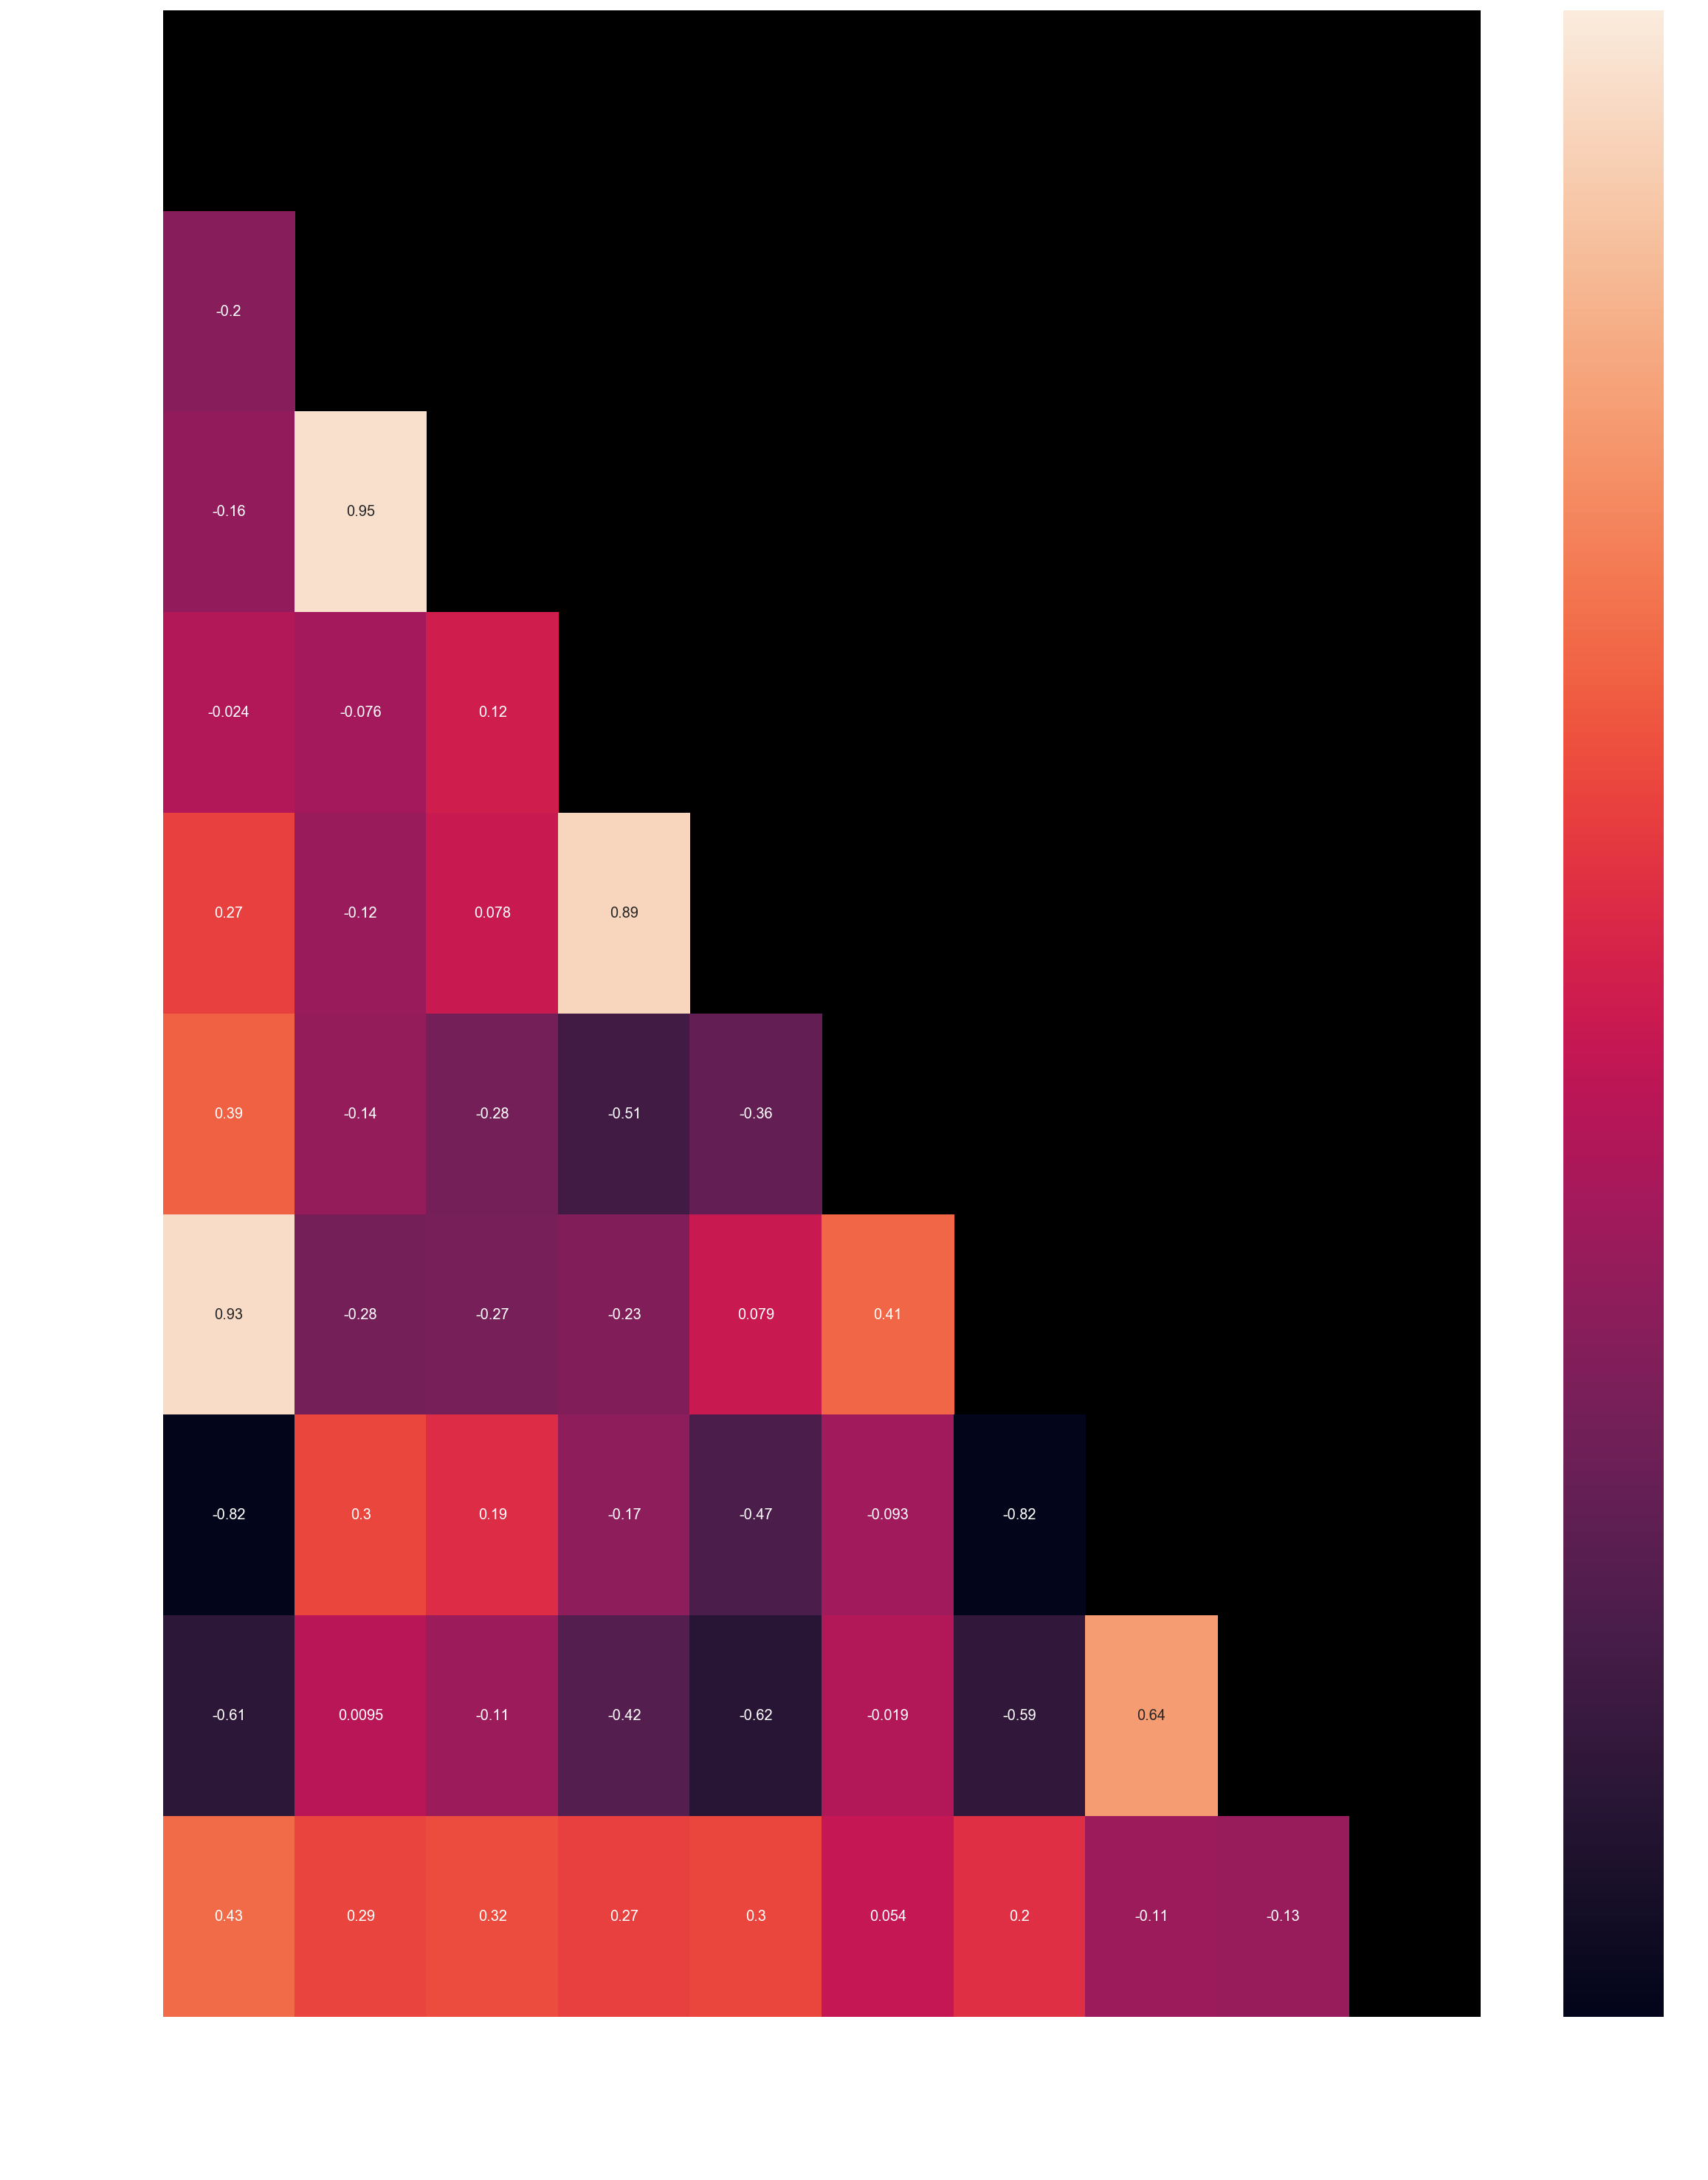

In [35]:
#heat map function
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20,25))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(corr_matrix)

Text(0.5,1,u'Sale Price vs Ground Living Area')

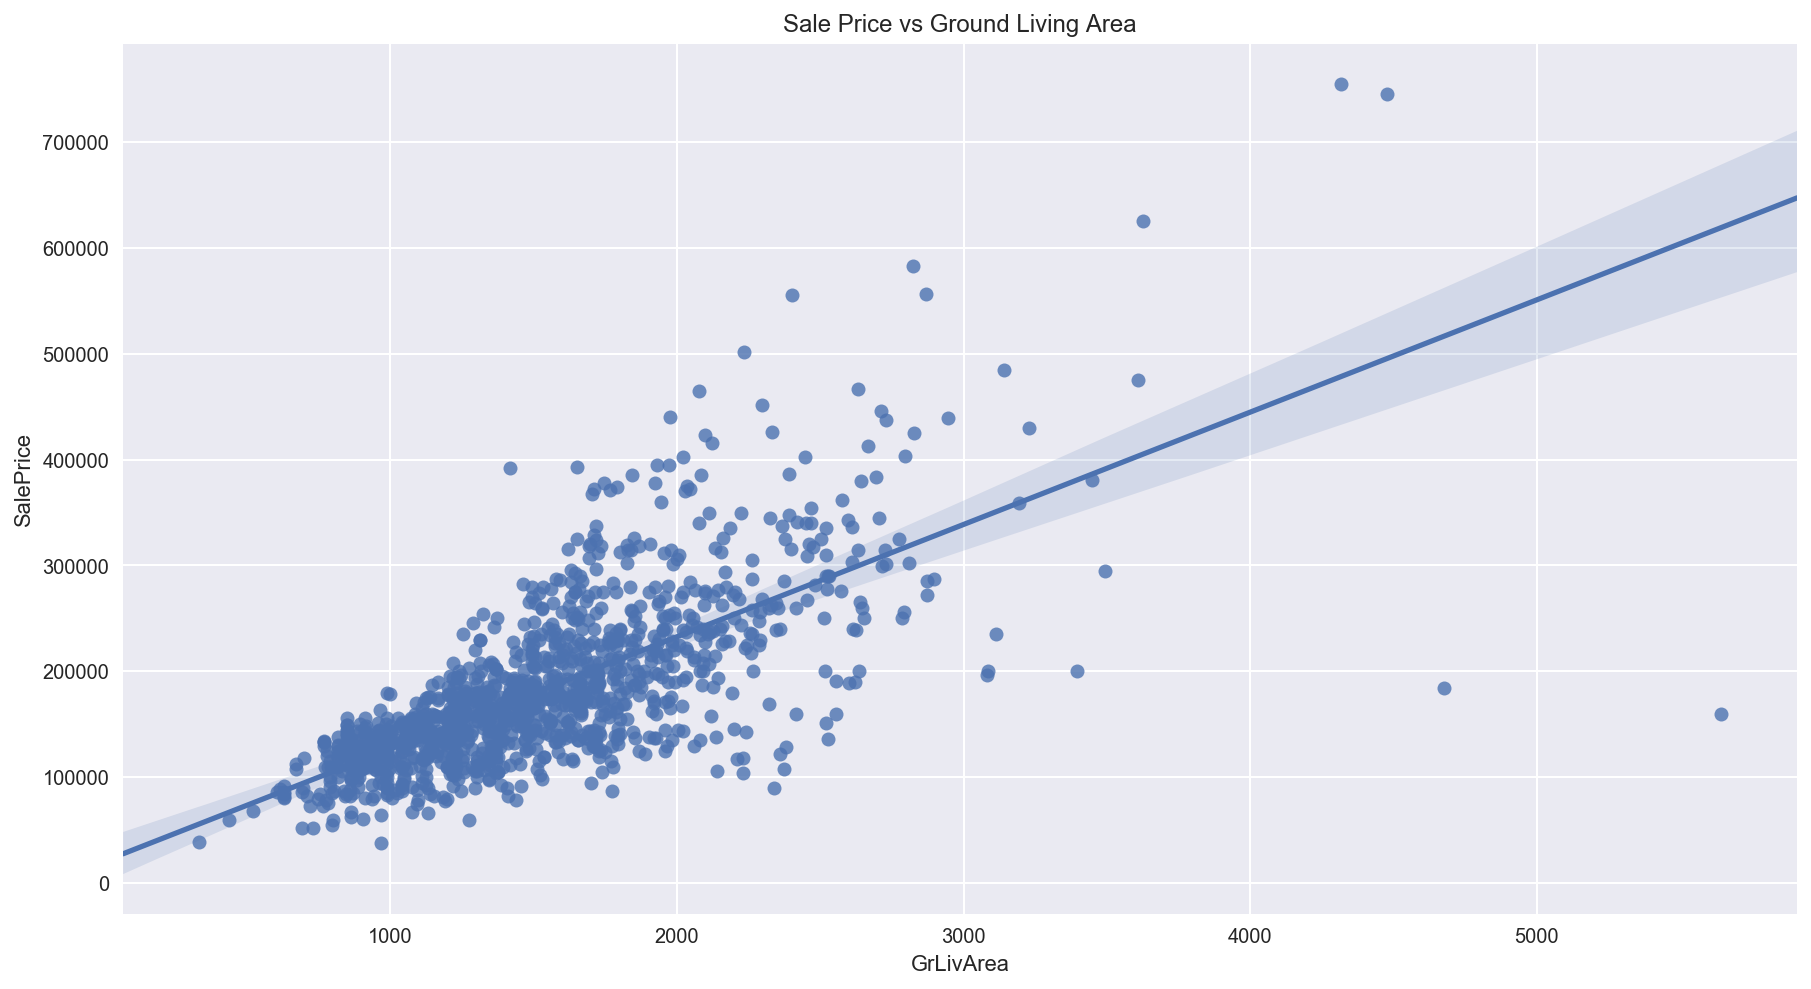

In [36]:
#Checking the impact of sale prive vs features
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Ground Living Area')

Text(0.5,1,u'Sale Price vs Garage Cars')

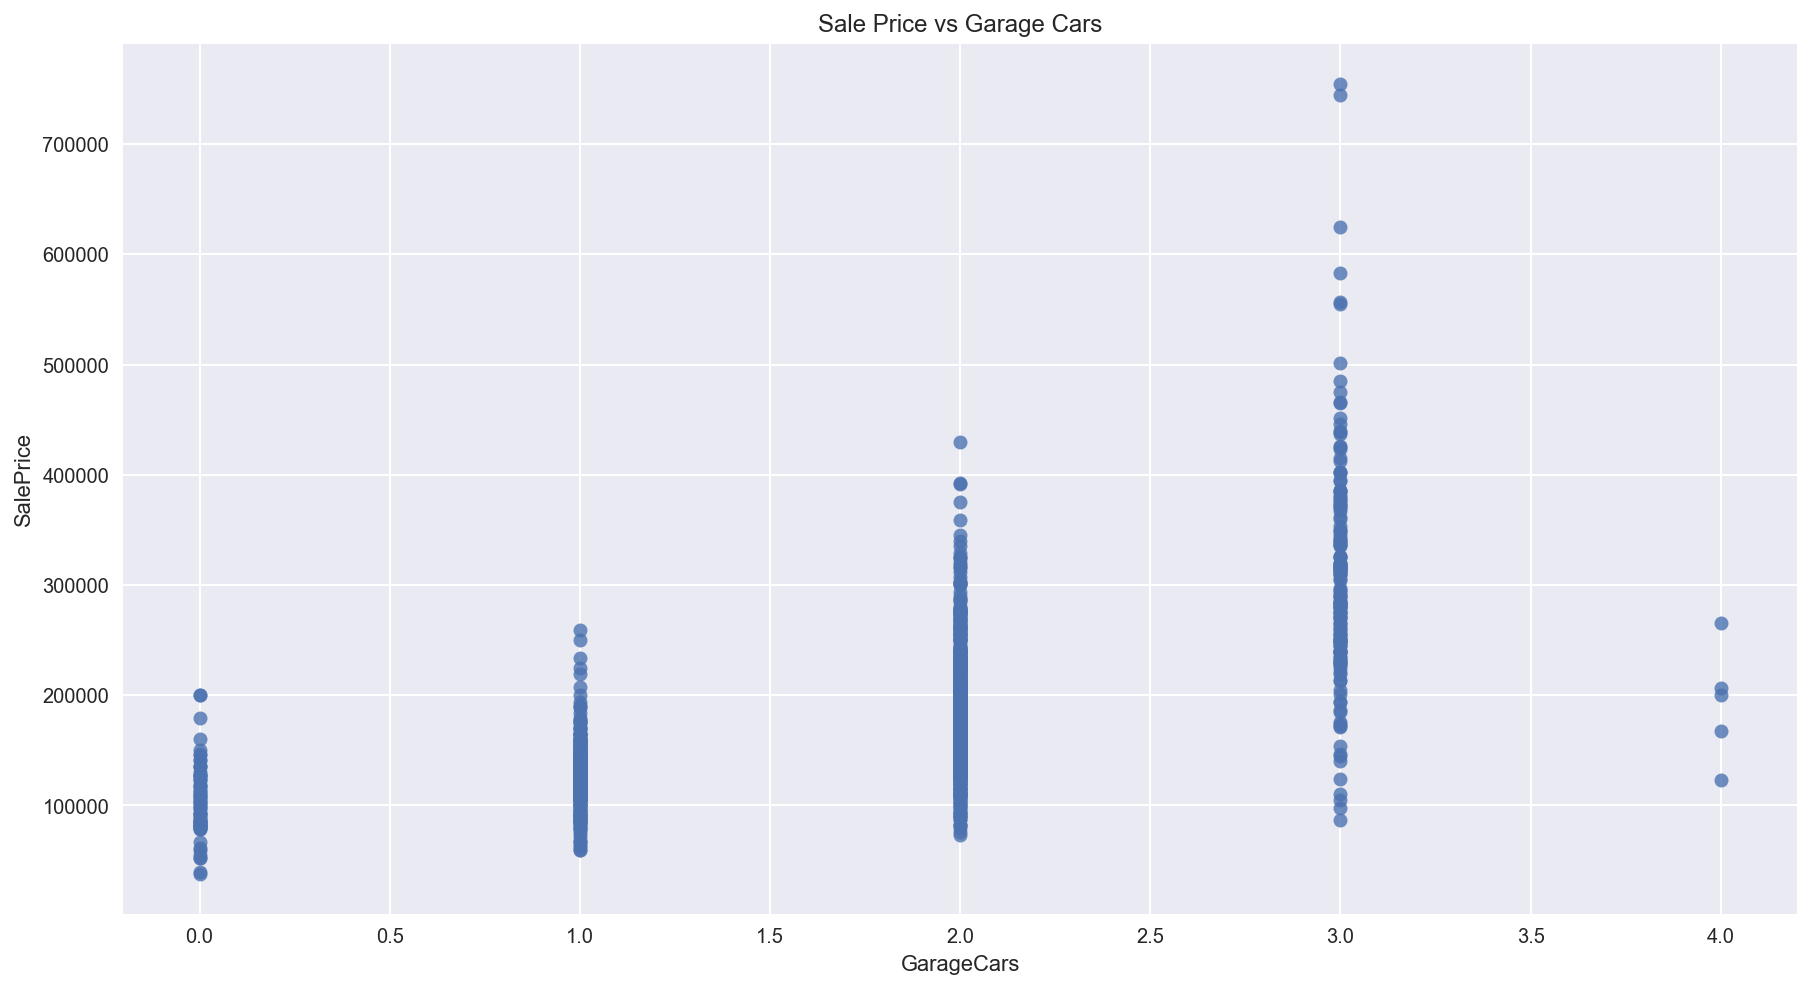

In [37]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=train_fixed, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

Text(0.5,1,u'Sale Price vs Garage Area')

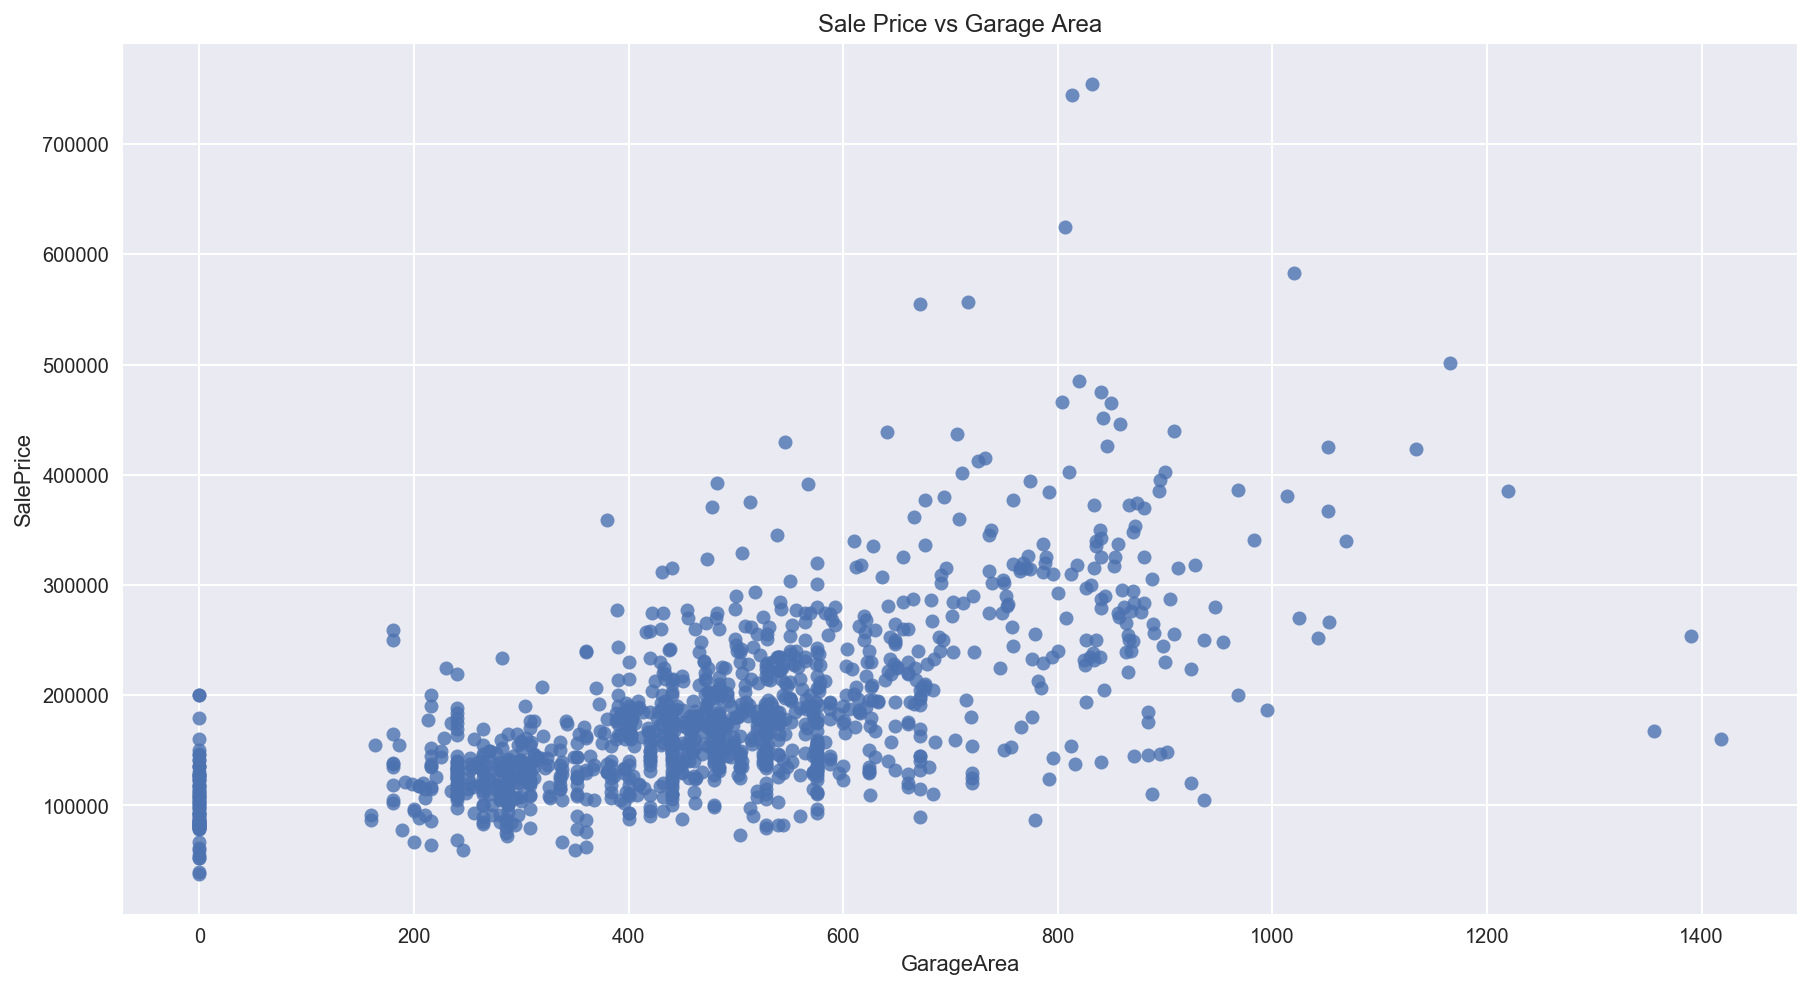

In [38]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="GarageArea", y="SalePrice", data=train_fixed, fit_reg = False)
plt.title('Sale Price vs Garage Area')

Text(0.5,1,u'Sale Price vs Total Basement Size')

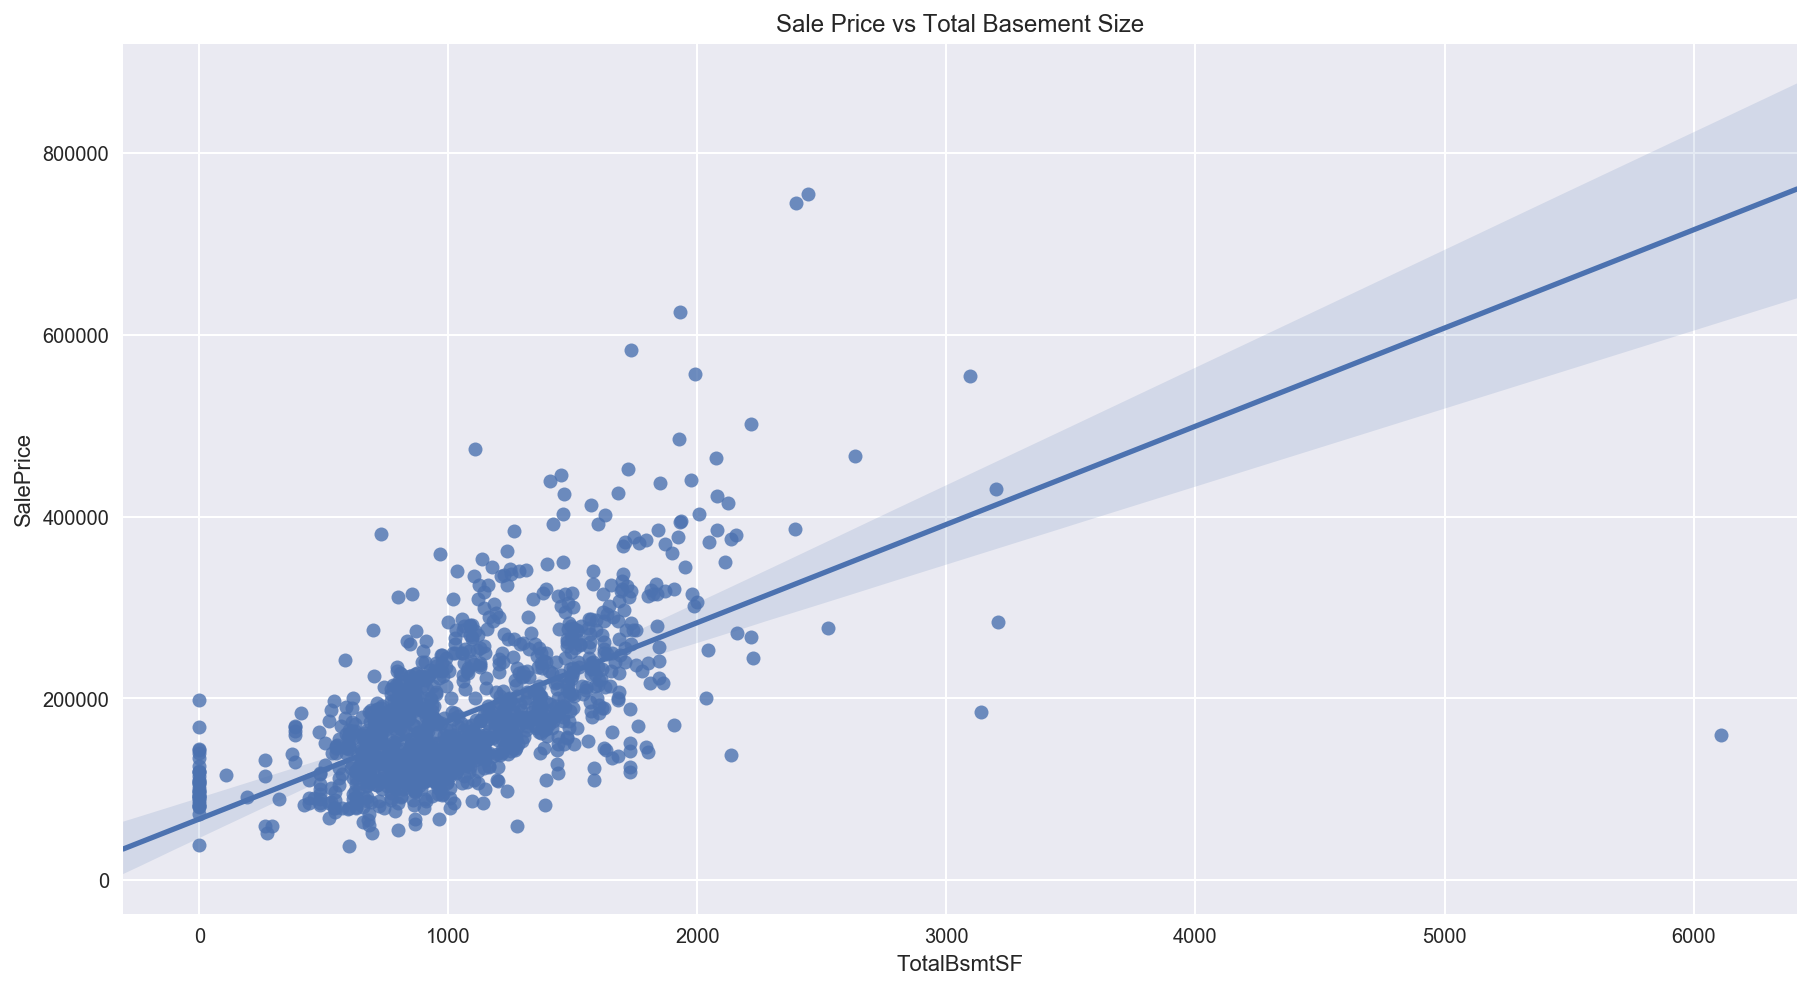

In [39]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Total Basement Size')

Text(0.5,1,u'Sale Price vs Ground Living Area')

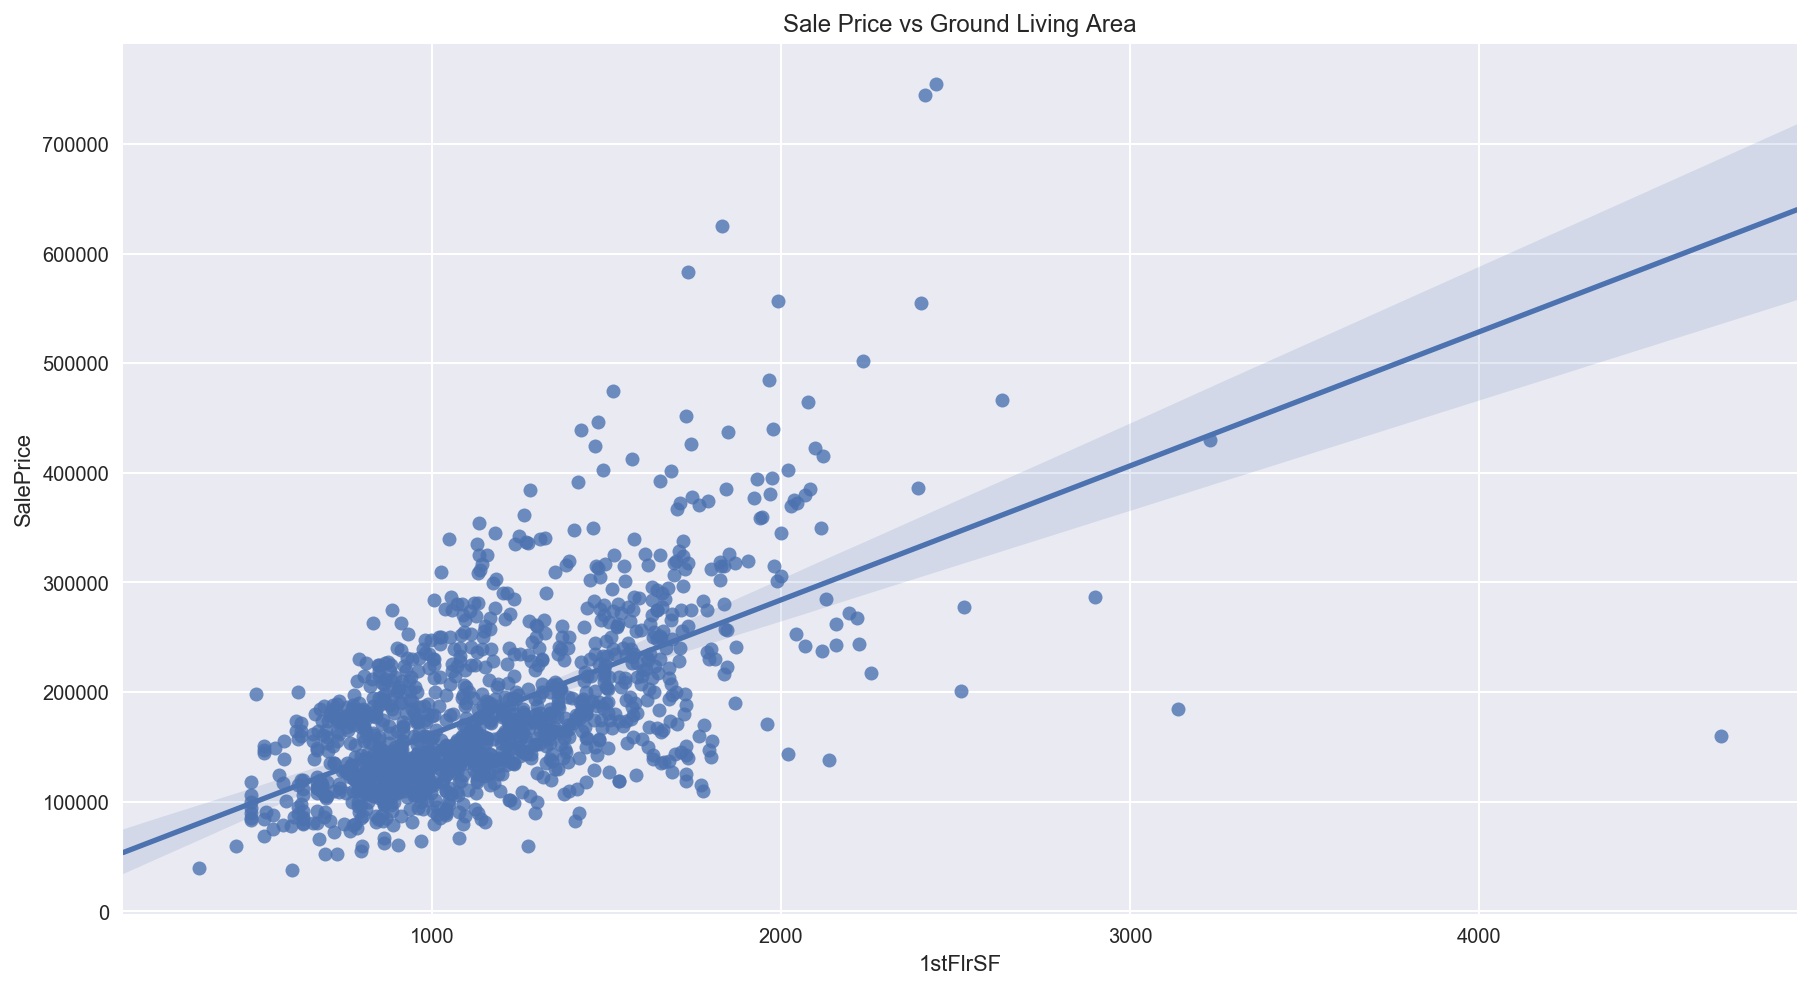

In [40]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="1stFlrSF", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Ground Living Area')

Text(0.5,1,u'Sale Price vs No. of Bathrooms')

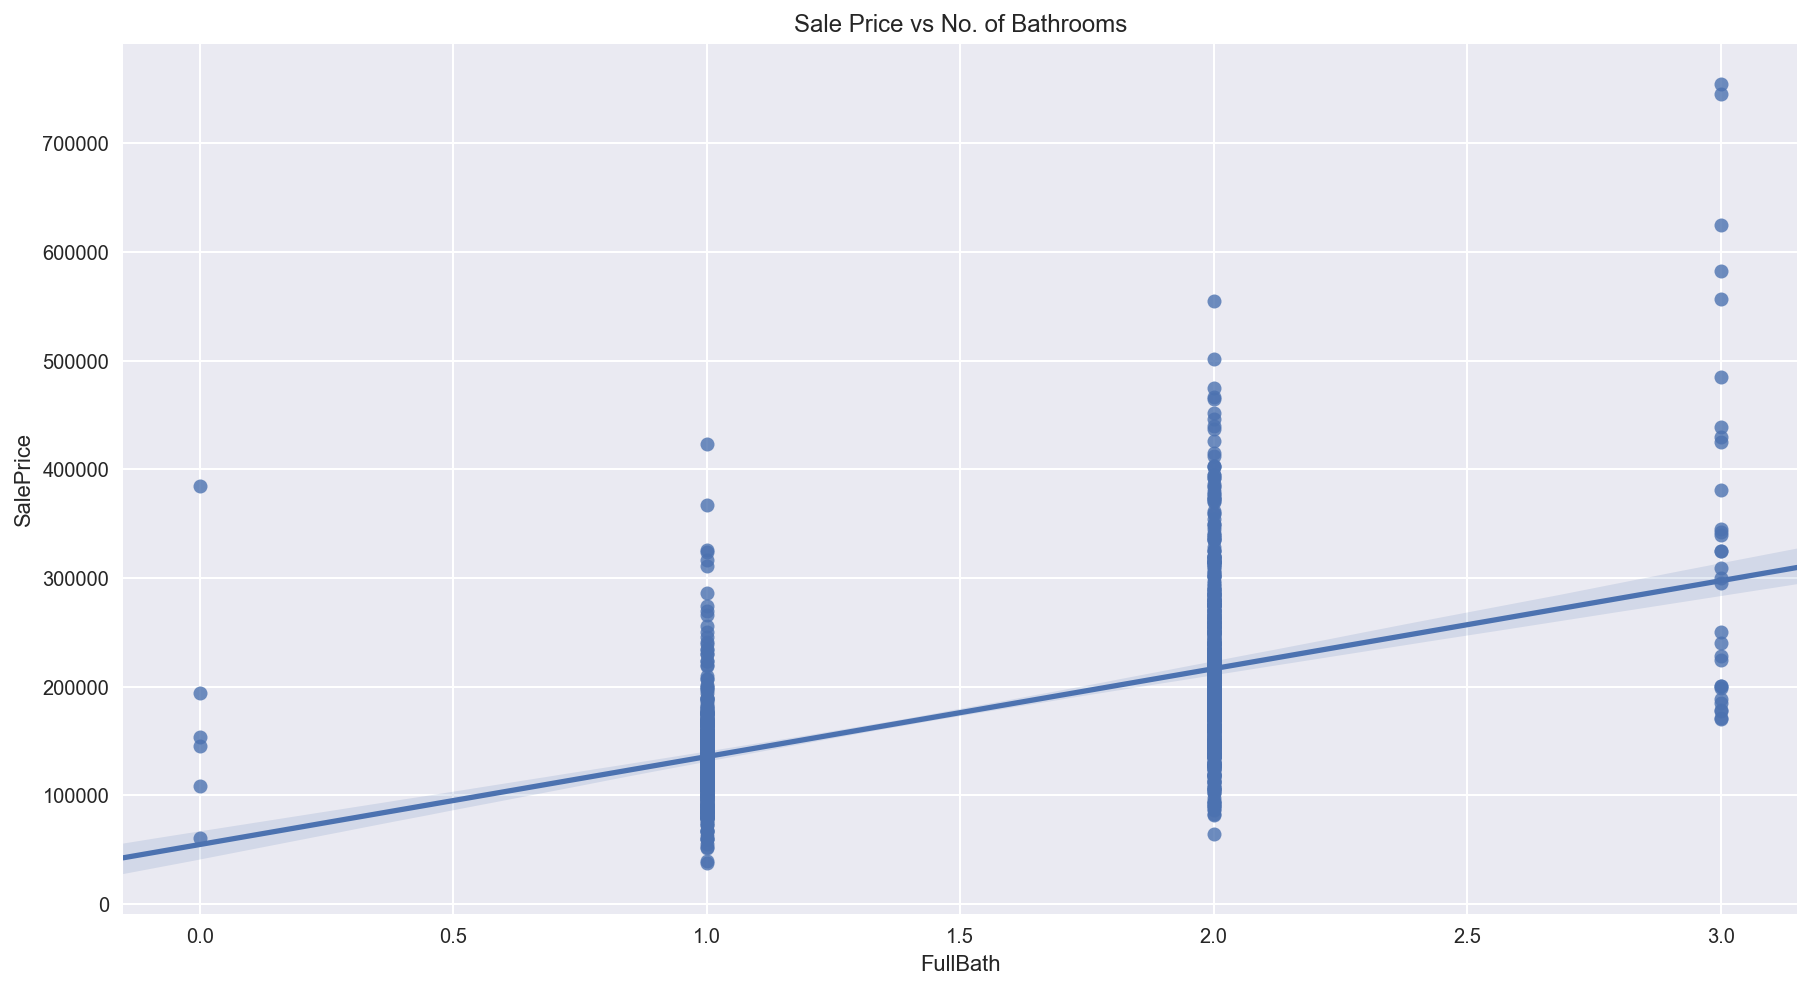

In [41]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs No. of Bathrooms')

Text(0.5,1,u'Sale Price vs Total Rooms Above Grade')

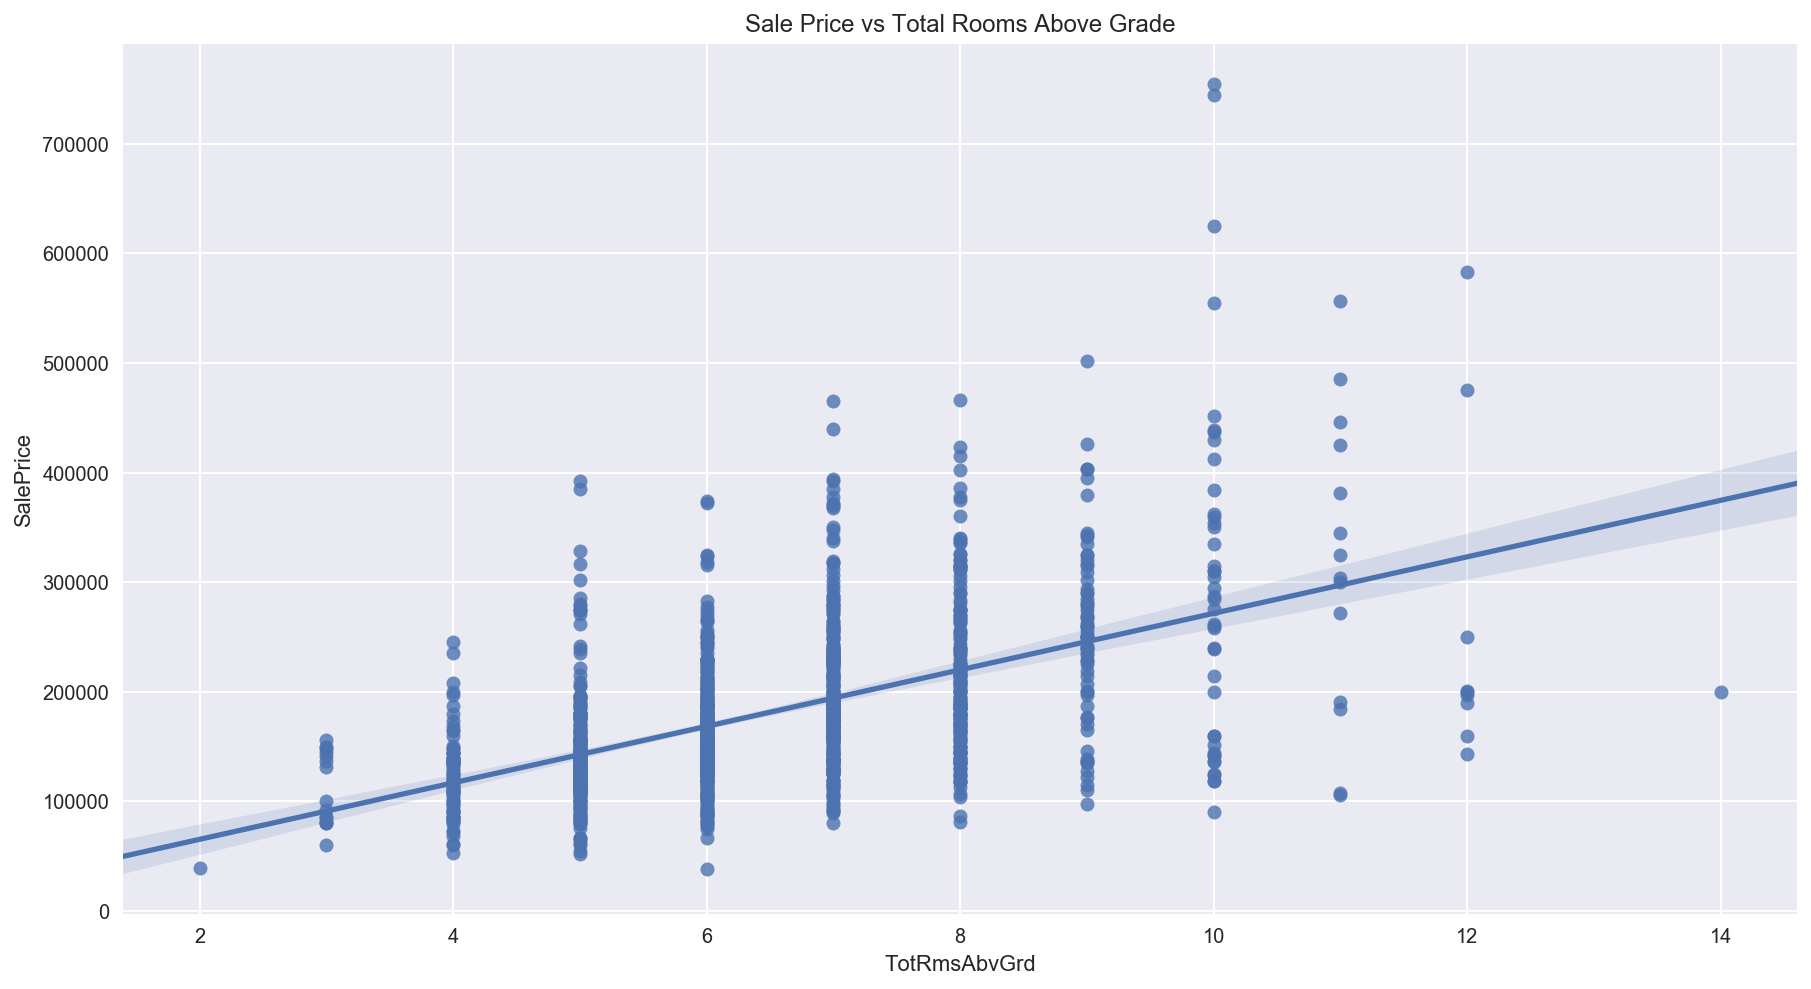

In [42]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="TotRmsAbvGrd", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Total Rooms Above Grade')

Text(0.5,1,u'Sale Price vs Year Built')

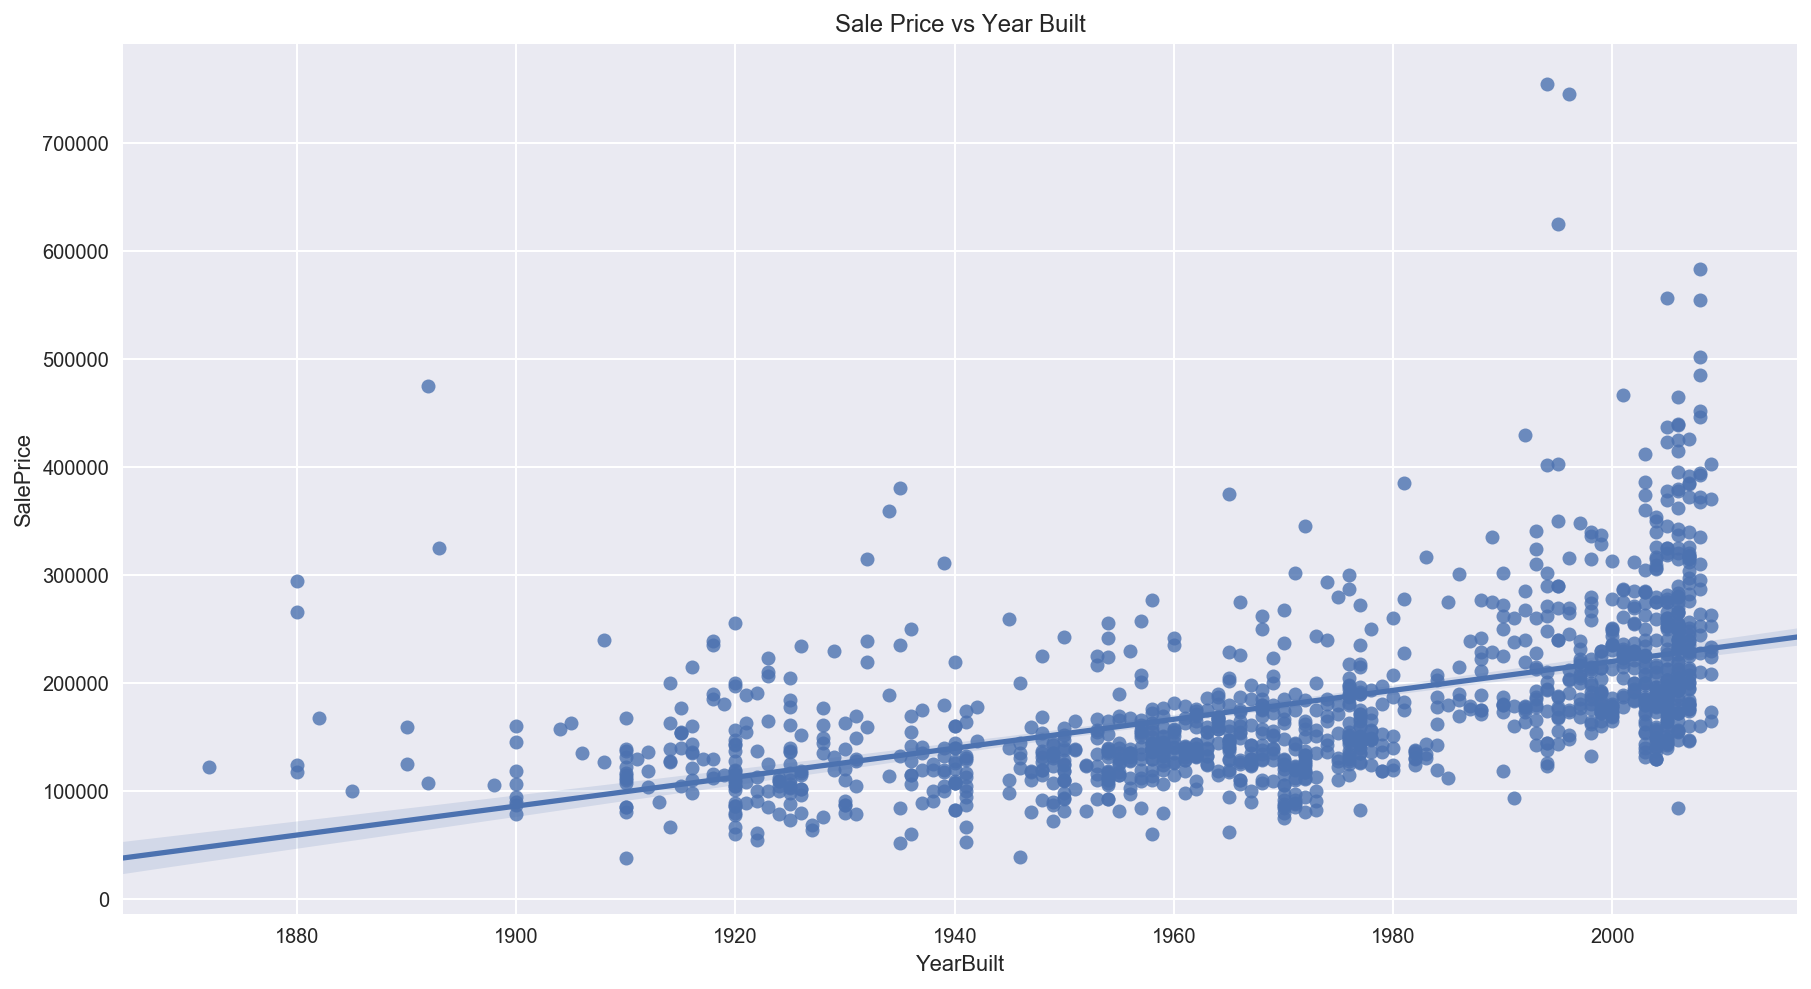

In [43]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Year Built')

Text(0.5,1,u'Sale Price vs Remodel date ')

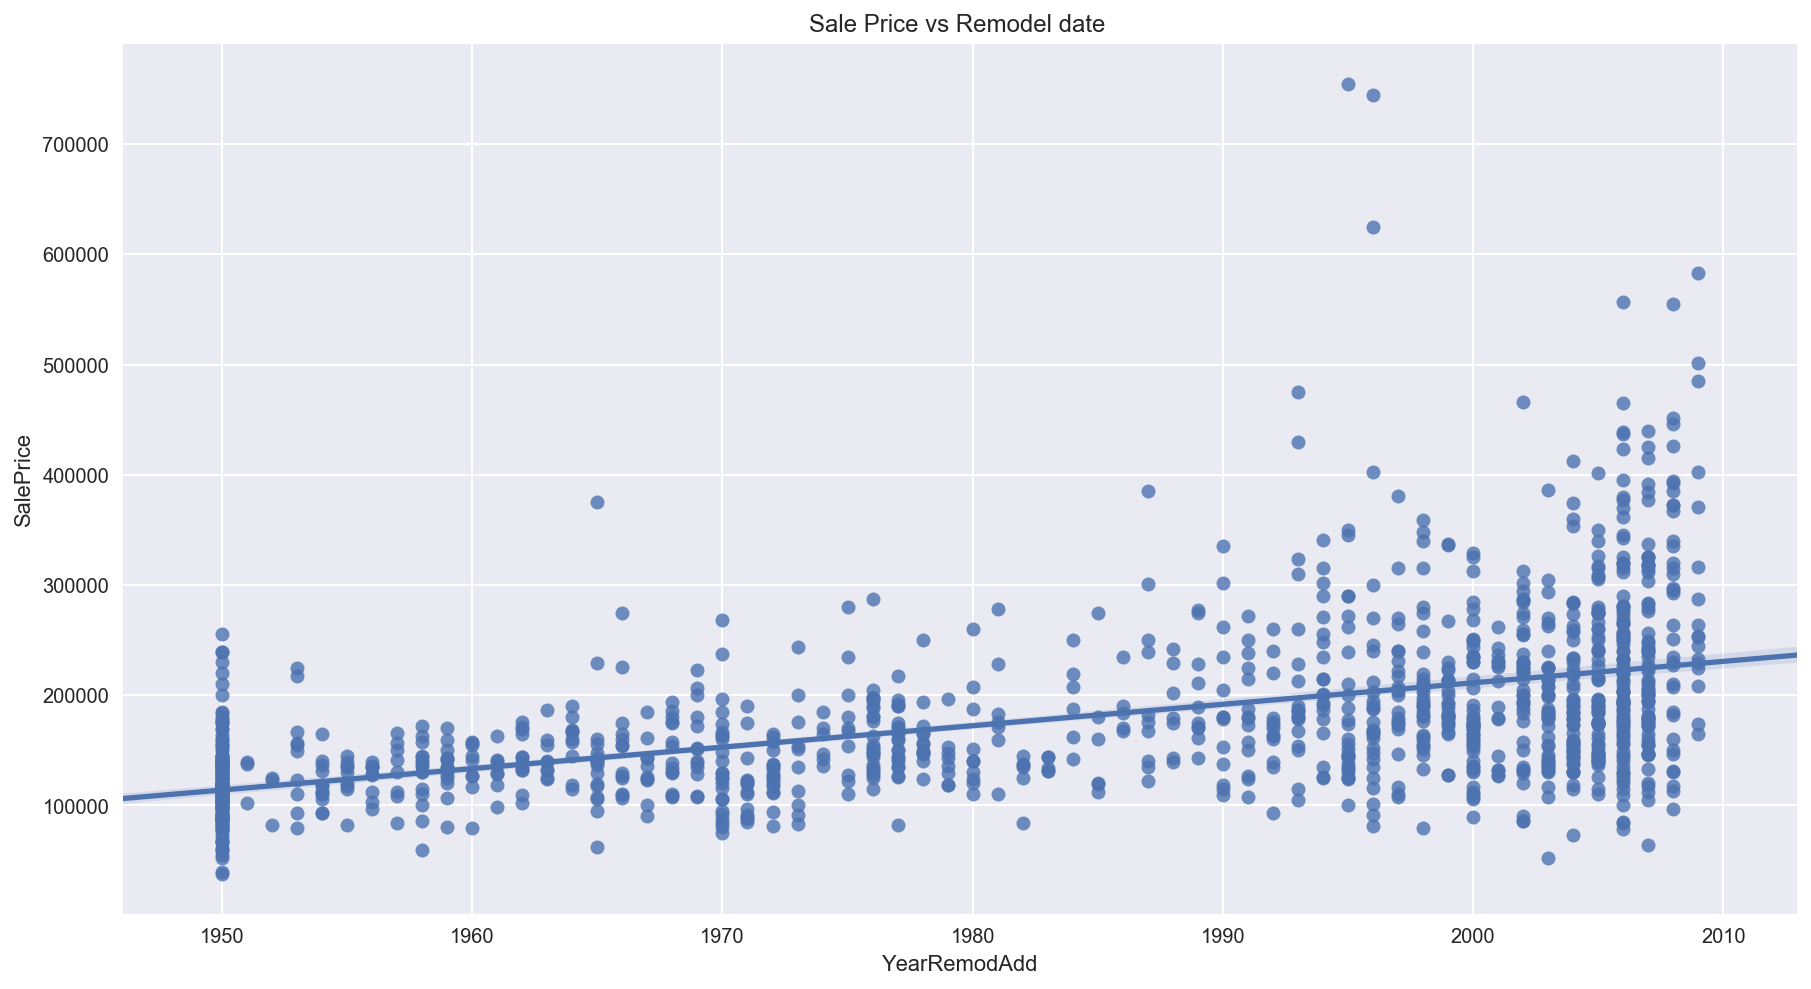

In [44]:
plt.figure(figsize=(15,8))
sns.set(color_codes=True)
ax = sns.regplot(x="YearRemodAdd", y="SalePrice", data=train_fixed)
plt.title('Sale Price vs Remodel date ')

In [45]:
# Note: Fixed features include sale price
# features will not have the sale price
features=['GrLivArea',
          'GarageCars',
          'GarageArea',
          'TotalBsmtSF',
          '1stFlrSF',
          'FullBath',
          'TotRmsAbvGrd',
          'YearBuilt',
          'YearRemodAdd']

X_test = test[features]
y_test = test['SalePrice']

In [46]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

train_y = train_fixed['SalePrice']
train_X = train_fixed[features]

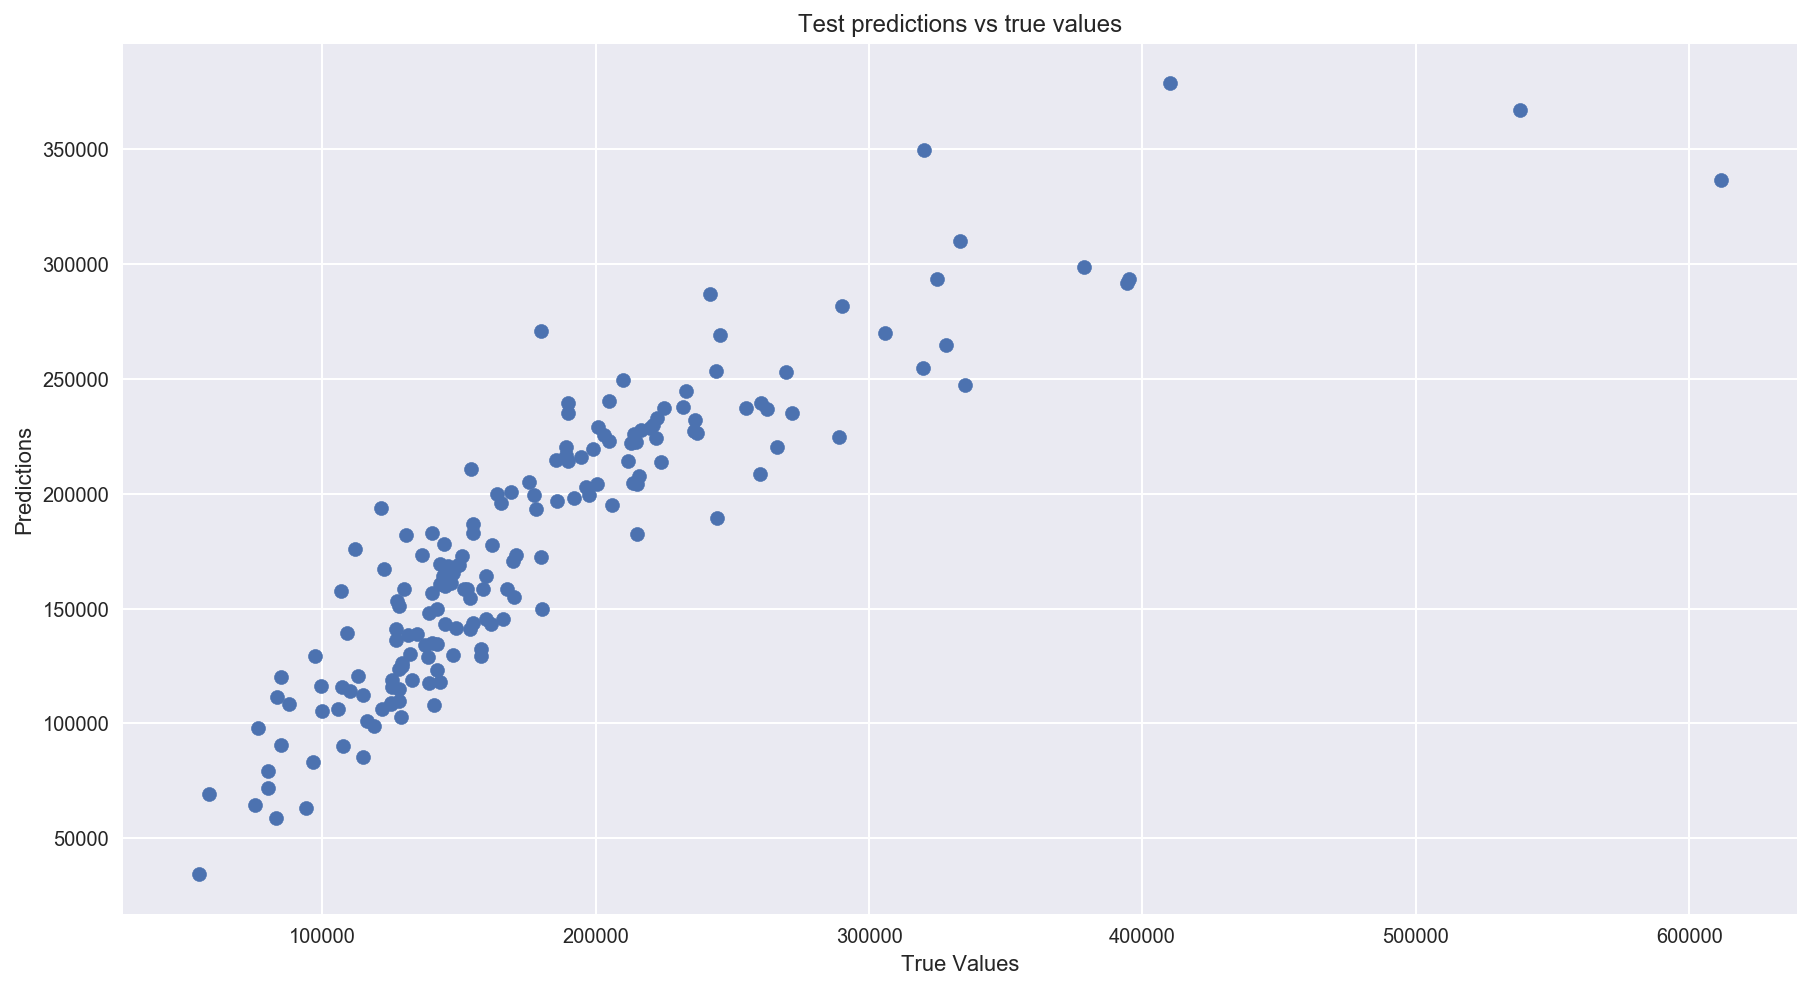

('Test R2 score for linear regression', 0.7698636886820779)
('Train R2 score for linear regression', 0.7237151772472943)
('Linear regression coefficients', array([ 7.40596366e+01,  1.75962930e+04,  1.30108712e+01,  3.20309032e+01,
        5.54203459e+00, -3.81537535e+03, -2.10430167e+03,  4.36486168e+02,
        5.44681232e+02]))


In [195]:
plt.figure(figsize=(15,8))
slr = LinearRegression()
slr.fit(train_X, train_y)
predictions_test = slr.predict(X_test)
plt.scatter(y_test, predictions_test)
plt.title("Test predictions vs true values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
    
print("Test R2 score for linear regression", slr.score(X_test, y_test))
print("Train R2 score for linear regression", slr.score(train_X, train_y))
print("Linear regression coefficients", slr.coef_)

In [48]:
# Using Ridge and Lasso Regression
from sklearn import linear_model, svm
from sklearn.cross_validation import cross_val_score,cross_val_predict,StratifiedKFold

## Ridge Regression with built in cross validation ####
# by default it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.001) 
clf_Ridge.fit(train_X, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_X, train_y, cv = 10, scoring = 'r2')

#### LassoCV######
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_X, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_X, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ''
print 'The R2 score for Ridge is', clf_Ridge_score.mean()
print 'The R2 score for Lasso is ', clf_lasso_score.mean()


# Fit model on test data
from sklearn import metrics
y_predd = clf_Ridge.predict(X_test)
print 'RMSE for Ridge is ', np.sqrt(metrics.mean_squared_error(y_test, y_predd))


y_pred = clf_lasso.predict(X_test)
print 'RMSE for Lasso is ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



The R2 score for Ridge is 0.7139095197738481
The R2 score for Lasso is  0.7152268346246768
RMSE for Ridge is  38247.112771162596
RMSE for Lasso is  38382.37215870058


## Note the below is using a model with features where full bath is removed

In [49]:
# features2 will not have the full bath since it was the least value to sale price in the heat map
# how much will it affect the rest?
features2=['GrLivArea',
          'GarageCars',
          'GarageArea',
          'TotalBsmtSF',
          '1stFlrSF',
          'TotRmsAbvGrd',
          'YearBuilt',
          'YearRemodAdd']

X_test2 = test[features2]
y_test2 = test['SalePrice']

train_y2 = train_fixed['SalePrice']
train_X2 = train_fixed[features2]

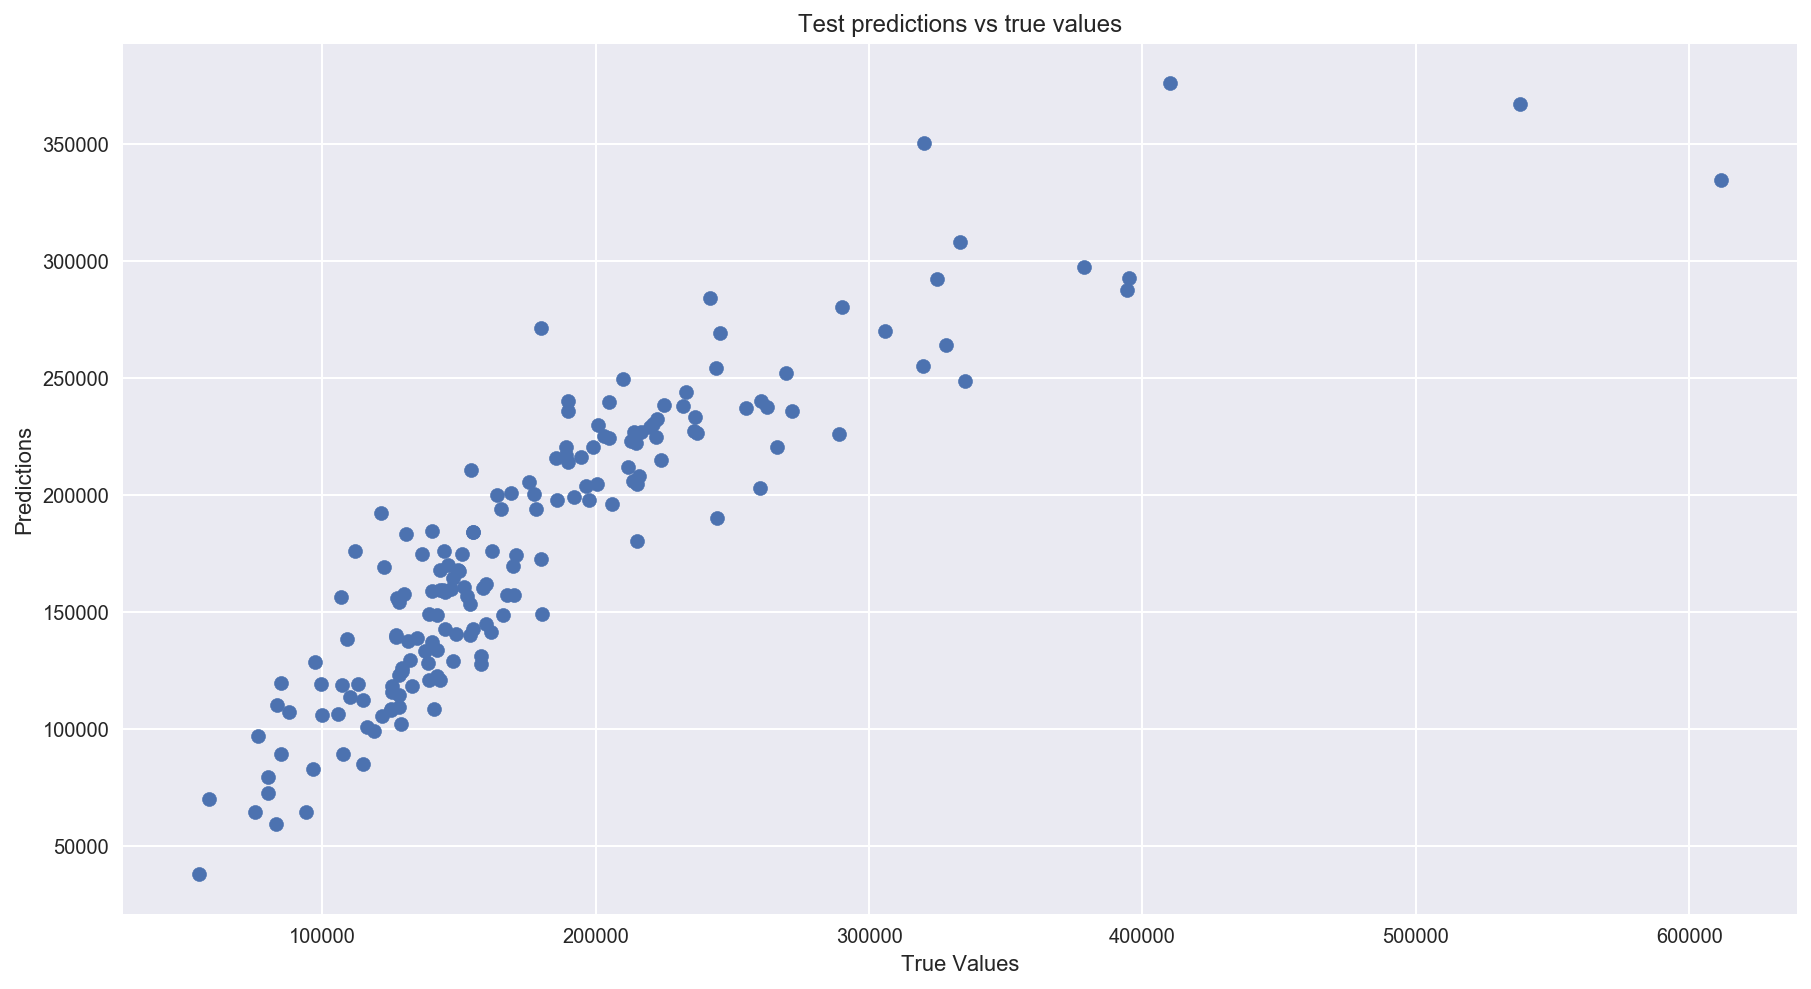

In [50]:
plt.figure(figsize=(15,8))
slr = LinearRegression()
slr.fit(train_X2, train_y2)
predictions_test2 = slr.predict(X_test2)
plt.scatter(y_test2, predictions_test2)
plt.title("Test predictions vs true values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [51]:
clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.001) 
clf_Ridge.fit(train_X2, train_y2)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_X2, train_y2, cv = 10, scoring = 'r2')

#### LassoCV######
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_X2, train_y2)
clf_lasso_score = cross_val_score(clf_lasso, train_X2, train_y2, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ''
print 'The R2 score for Ridge is', clf_Ridge_score.mean()
print 'The R2 score for Lasso is ', clf_lasso_score.mean()


# Fit model on test data
from sklearn import metrics
y_predd2 = clf_Ridge.predict(X_test2)
print 'RMSE for Ridge is ', np.sqrt(metrics.mean_squared_error(y_test2, y_predd2))


y_pred2 = clf_lasso.predict(X_test2)
print 'RMSE for Lasso is ', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))


The R2 score for Ridge is 0.7147436664655284
The R2 score for Lasso is  0.7152268346246768
RMSE for Ridge is  38422.8617348388
RMSE for Lasso is  38382.37215870057


In [52]:
# This tells me that removing the full bath feature does not may a significant change to the score. Will continue using the first model.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [196]:
# Calculate the residuals from the first model
slr = LinearRegression()
slr.fit(train_X, train_y)
y_predicted = slr.predict(X_test)
print y_predicted[:10]
price=test['SalePrice'].values

[141417.63255495 141248.32497431 139104.08821199 269779.79838669
 196114.06978598 139426.26288513 254589.02385481 114030.92811953
 134915.193019   270957.59313666]


In [197]:
y_predicted

array([141417.63255495, 141248.32497431, 139104.08821199, 269779.79838669,
       196114.06978598, 139426.26288513, 254589.02385481, 114030.92811953,
       134915.193019  , 270957.59313666,  72047.46425536, 159588.01267356,
       115826.47715906, 173176.50013951,  58678.61161209, 102944.98590917,
       223087.81702316, 193400.77436738, 219525.03515549, 234891.90570613,
       172203.38341869, 349408.61450772,  85332.43538564, 145644.416817  ,
       232953.77435464, 253049.74327019, 237119.66666992, 228357.77064595,
       182356.51531934, 183066.0389967 , 196722.84219444, 143129.90561174,
       108734.07506315, 129948.55928534, 115190.8909295 , 227556.78372608,
       214809.1548544 , 215711.37057795, 120436.96328645, 236928.4571177 ,
       240298.02592053,  97801.3921951 , 143252.23940763, 158530.47716038,
       281464.52356246, 229049.90047805, 108210.32350961, 106089.31912709,
       286644.32354225, 225648.68035898, 120353.38603595, 106333.11978861,
       130314.4918896 , 1

In [163]:
pred = pd.DataFrame()
pred["fixedPrediction"] = y_predicted
pred['SalePrice'] = price
pred['Residual'] = np.round(pred['SalePrice'] - pred['fixedPrediction'], 2)

print pred.shape

(172, 3)


In [164]:
pred.isnull().sum()

fixedPrediction    0
SalePrice          0
Residual           0
dtype: int64

In [154]:
data = houseCopy[houseCopy.MSZoning.isin(['RL','FV', 'RH','RM'])]

In [155]:
# renovatable features
reno_feats = data[['RoofStyle',
              'RoofMatl',
              'Exterior1st',
              'Exterior2nd',
              'MasVnrType',
              'ExterQual',
              'ExterCond',
              'BsmtQual',
              'BsmtCond',
              'BsmtExposure',
              'BsmtFinType1',
              'BsmtFinType2', 
              'Heating', 
              'HeatingQC', 
              'CentralAir',
              'KitchenQual',
              'Functional',
              'FireplaceQu', 
              'GarageFinish', 
              'GarageQual', 
              'GarageCond',          
              'PavedDrive', 
              'PoolQC', 
              'Fence',
              'OverallQual']]
reno_feats.head(1)

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,OverallQual
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,Gd,Typ,None,RFn,TA,TA,Y,None,None,7


In [156]:
#once more with dummies...
dummycol = reno_feats[['RoofStyle',
           'RoofMatl',
           'Exterior1st',
           'Exterior2nd',
           'MasVnrType',
           'ExterQual',
           'ExterCond',
           'BsmtQual',
           'BsmtCond',
           'BsmtExposure',
           'BsmtFinType1',
           'BsmtFinType2', 
           'Heating', 
           'HeatingQC', 
           'CentralAir',
           'KitchenQual',
           'Functional',
           'FireplaceQu', 
           'GarageFinish', 
           'GarageQual', 
           'GarageCond',          
           'PavedDrive', 
           'PoolQC', 
           'Fence']]
dummycol.head(1)

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,Gd,Typ,None,RFn,TA,TA,Y,None,None


In [158]:
reno_dummy = pd.get_dummies(dummycol, drop_first=True)
reno_dummy.head(2)

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [159]:
renohouseDummy = reno_feats.join(reno_dummy).drop(dummycol.columns.values, axis=1)
renohouseDummy.head(1)

,OverallQual,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1


In [160]:
renohouseDummy.isnull().sum()

OverallQual            0
RoofStyle_Gable        0
RoofStyle_Gambrel      0
RoofStyle_Hip          0
RoofStyle_Mansard      0
RoofStyle_Shed         0
RoofMatl_CompShg       0
RoofMatl_Membran       0
RoofMatl_Metal         0
RoofMatl_Roll          0
RoofMatl_Tar&Grv       0
RoofMatl_WdShake       0
RoofMatl_WdShngl       0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
Exterior2nd_AsphShn    0
Exterior2nd_Brk Cmn    0
Exterior2nd_BrkFace    0
                      ..
Functional_Mod         0
Functional_Sev         0
Functional_Typ         0
FireplaceQu_Fa         0
FireplaceQu_Gd         0
FireplaceQu_None       0
FireplaceQu_Po         0
FireplaceQu_TA         0
GarageFinish_None      0


In [161]:
renohouseDummy.columns.values

array(['OverallQual', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterio

In [166]:
renohouseDummy['YrSold'] = data['YrSold']
renohouseDummy['SalePrice'] = data['SalePrice']

In [167]:
print renohouseDummy.shape

(1449, 124)


In [169]:
# Latest year for yrsold was 2010. Will use that as the test
trainReno = renohouseDummy[renohouseDummy['YrSold']<2010]
testReno  = renohouseDummy[renohouseDummy['YrSold']==2010]

print trainReno.shape
print testReno.shape
print trainReno.isnull().sum()
print testReno.isnull().sum()

(1277, 124)
(172, 124)
OverallQual            0
RoofStyle_Gable        0
RoofStyle_Gambrel      0
RoofStyle_Hip          0
RoofStyle_Mansard      0
RoofStyle_Shed         0
RoofMatl_CompShg       0
RoofMatl_Membran       0
RoofMatl_Metal         0
RoofMatl_Roll          0
RoofMatl_Tar&Grv       0
RoofMatl_WdShake       0
RoofMatl_WdShngl       0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0
Exterior2nd_AsphShn    0
Exterior2nd_Brk Cmn    0
Exterior2nd_BrkFace    0
                      ..
Functional_Typ         0
FireplaceQu_Fa         0
FireplaceQu_Gd         0
FireplaceQu_None       0
FireplaceQu_Po         0
FireplaceQu_TA         0
GarageFinish_None      0
GarageFinish_RFn       0
Ga

In [173]:
print testReno.shape
print len(pred['Residual'])
# With the residuals being calculated from the test set, corr will have to follow as well
testReno['Residual']=pred['Residual'].values

(172, 125)
172


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [176]:
#check for null values
# Check if there is any missing value
total = testReno.isnull().sum().sort_values(ascending=False)
percent = (testReno.isnull().sum()/testReno.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

print 'There are {} null values.'.format(testReno.isnull().sum().max())

There are 0 null values.


In [177]:
corr = testReno.corr()['SalePrice']

corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.780928
Residual,0.637108
BsmtFinType1_GLQ,0.428180
ExterQual_Gd,0.415225
BsmtExposure_Gd,0.320173
Exterior2nd_VinylSd,0.295831
RoofStyle_Hip,0.292600
MasVnrType_Stone,0.288808
FireplaceQu_Gd,0.278599


In [178]:
# Check correlations of reno against Residual this time 
corr2=testReno.corr()['Residual']
corr2[np.argsort(corr2, axis=0)[::-1]]

print corr2

OverallQual            0.312560
RoofStyle_Gable       -0.216796
RoofStyle_Gambrel     -0.019259
RoofStyle_Hip          0.233147
RoofStyle_Mansard     -0.079655
RoofStyle_Shed         0.100845
RoofMatl_CompShg      -0.006483
RoofMatl_Membran            NaN
RoofMatl_Metal              NaN
RoofMatl_Roll               NaN
RoofMatl_Tar&Grv            NaN
RoofMatl_WdShake       0.006483
RoofMatl_WdShngl            NaN
Exterior1st_AsphShn   -0.013053
Exterior1st_BrkComm         NaN
Exterior1st_BrkFace    0.064627
Exterior1st_CBlock          NaN
Exterior1st_CemntBd    0.131140
Exterior1st_HdBoard   -0.048461
Exterior1st_ImStucc         NaN
Exterior1st_MetalSd    0.009466
Exterior1st_Plywood   -0.121987
Exterior1st_Stone           NaN
Exterior1st_Stucco     0.082033
Exterior1st_VinylSd    0.062933
Exterior1st_Wd Sdng   -0.077934
Exterior1st_WdShing    0.003132
Exterior2nd_AsphShn   -0.013053
Exterior2nd_Brk Cmn   -0.047608
Exterior2nd_BrkFace   -0.051443
                         ...   
Fireplac

In [179]:
# Creating the target from the residual
target = testReno['Residual'].astype(int)

In [180]:
# Tests and targets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
res_house_reno = testReno.drop('Residual', axis=1)
scaled_res_house_reno = scaler.fit_transform(res_house_reno)

# Realized that the index was retained from the previous data
# have to drop all the nan rows first as it affects the ridge regression
print scaled_res_house_reno.shape
print len(target)
print type(scaled_res_house_reno.shape)
print type(target)

(172L, 124L)
172
<type 'tuple'>
<class 'pandas.core.series.Series'>


In [181]:
X, y = scaled_res_house_reno, target

In [182]:
# Making a new train/test data
from sklearn.model_selection import train_test_split

X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X, y, test_size=0.33)

print 'X_train : {}'.format(X_rtrain.shape)
print 'y_train : {}'.format(y_rtrain.shape)
print 'X_test : {}'.format(X_rtest.shape)
print 'y_test : {}'.format(y_rtest.shape)

X_train : (115L, 124L)
y_train : (115L,)
X_test : (57L, 124L)
y_test : (57L,)


In [183]:
# Ridge regression

model_ridge = RidgeCV(alphas=(.001, .01, .1, 1, 10, 100)).fit(X_rtrain, y_rtrain)
res1 = np.sqrt(-cross_val_score(model_ridge,X_rtrain, y_rtrain, cv = 10, scoring = 'neg_mean_squared_error'))
res = cross_val_score(model_ridge,X_rtrain, y_rtrain, cv = 10)
print 'r2 ', res, res.mean()
print 'Mean:',res1.mean()
print 'Min: ',res1.min()

r2  [ 0.56132626  0.28645109  0.50455041 -0.56869765  0.26532869 -0.00203174
 -0.22250367 -1.62870827  0.09225292  0.69984116] -0.0012190792757879598
Mean: 28083.787627968442
Min:  18316.36646947344


In [186]:
coef = pd.Series(model_ridge.coef_, index = res_house_reno.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 92 variables and eliminated the other 32 variables


In [187]:
print coef

OverallQual            3.892869e+03
RoofStyle_Gable       -1.955953e+03
RoofStyle_Gambrel     -9.670113e+01
RoofStyle_Hip          2.210656e+03
RoofStyle_Mansard     -1.831355e+03
RoofStyle_Shed         1.859841e+03
RoofMatl_CompShg       6.910316e+02
RoofMatl_Membran       0.000000e+00
RoofMatl_Metal         0.000000e+00
RoofMatl_Roll          0.000000e+00
RoofMatl_Tar&Grv       0.000000e+00
RoofMatl_WdShake      -6.910316e+02
RoofMatl_WdShngl       0.000000e+00
Exterior1st_AsphShn    0.000000e+00
Exterior1st_BrkComm    0.000000e+00
Exterior1st_BrkFace    8.838510e+02
Exterior1st_CBlock     0.000000e+00
Exterior1st_CemntBd   -3.190733e+01
Exterior1st_HdBoard   -8.125249e+02
Exterior1st_ImStucc    0.000000e+00
Exterior1st_MetalSd    2.750447e+02
Exterior1st_Plywood   -1.090980e+03
Exterior1st_Stone      0.000000e+00
Exterior1st_Stucco     5.676580e+02
Exterior1st_VinylSd    7.754860e+02
Exterior1st_Wd Sdng   -1.769482e+02
Exterior1st_WdShing    1.233044e+03
Exterior2nd_AsphShn    0.000

Text(0.5,1,u'Coefficients for Ridge Regression')

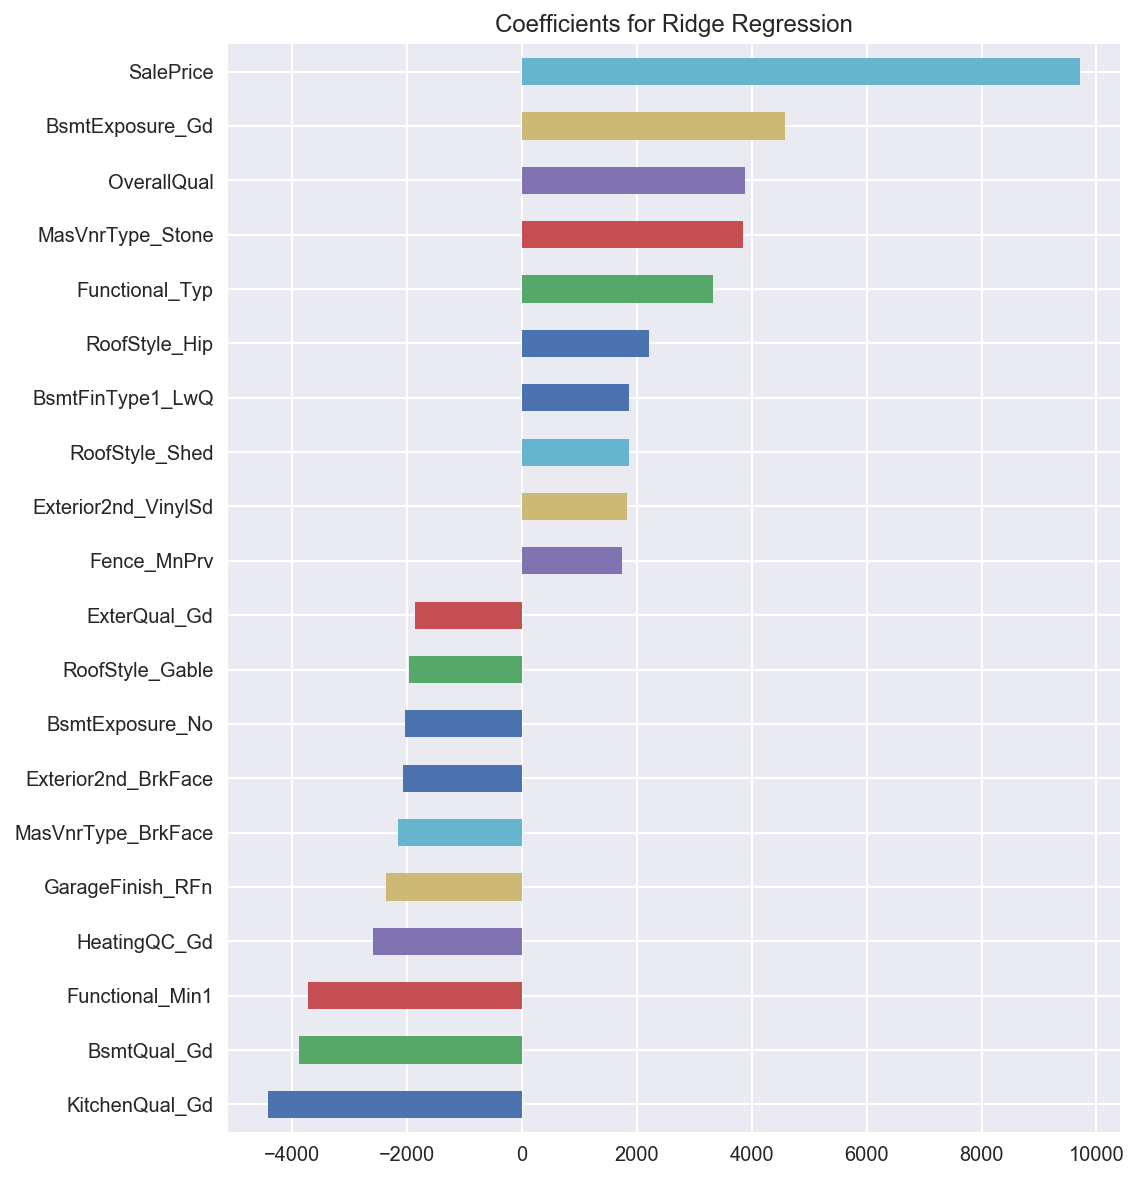

In [217]:
# Plotting the coefficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients for Ridge Regression")

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [233]:
# A:
# getting the data, once more only residential houses are used
# double check that the copy has no null values
data = houseCopy[houseCopy.MSZoning.isin(['RL','FV', 'RH','RM'])]

#check for null values
# Check if there is any missing value
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print missing_data.head(30)

print 'There are {} null values.'.format(testReno.isnull().sum().max())

               Total  Percent
SalePrice          0      0.0
SaleCondition      0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
MasVnrArea         0      0.0
ExterQual          0      0.0
ExterCond          0      0.0
Foundation         0      0.0
BsmtQual           0      0.0
BsmtCond           0      0.0
BsmtExposure       0      0.0
BsmtFinType1       0      0.0
BsmtFinSF1         0      0.0
BsmtFinType2       0      0.0
BsmtFinSF2         0      0.0
BsmtUnfSF          0      0.0
TotalBsmtSF        0      0.0
RoofStyle          0      0.0
YearRemodAdd       0      0.0
YearBuilt          0      0.0
Utilities          0      0.0
MSZoning           0      0.0
LotFrontage        0      0.0
LotArea            0      0.0
Street             0      0.0
Alley              0      0.0
LotShape           0      0.0
LandContour        0      0.0
There are 0 null values.


In [234]:
data['SaleCondition'].value_counts()

Normal     1193
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [235]:
#set value to indicate which houses are abnormal
data['Abnormal'] = [1 if con =='Abnorml' else 0 for con in data['SaleCondition']] 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [236]:
#  check for any errors
data['Abnormal'].value_counts()

0    1353
1      96
Name: Abnormal, dtype: int64

In [237]:
# The percantage of abnormal houses
abnormal= (data["Abnormal"] == 1).sum()
print abnormal
print len(data["SaleCondition"])
# Have to float the value else it'll be rounded up
abnormal=abnormal.astype(float)

abnormalPercent = abnormal/len(data["SaleCondition"])
base = 100- abnormalPercent*100

print '{}% of the houses are abnormal'.format(base)

96
1449
93.3747412008% of the houses are abnormal


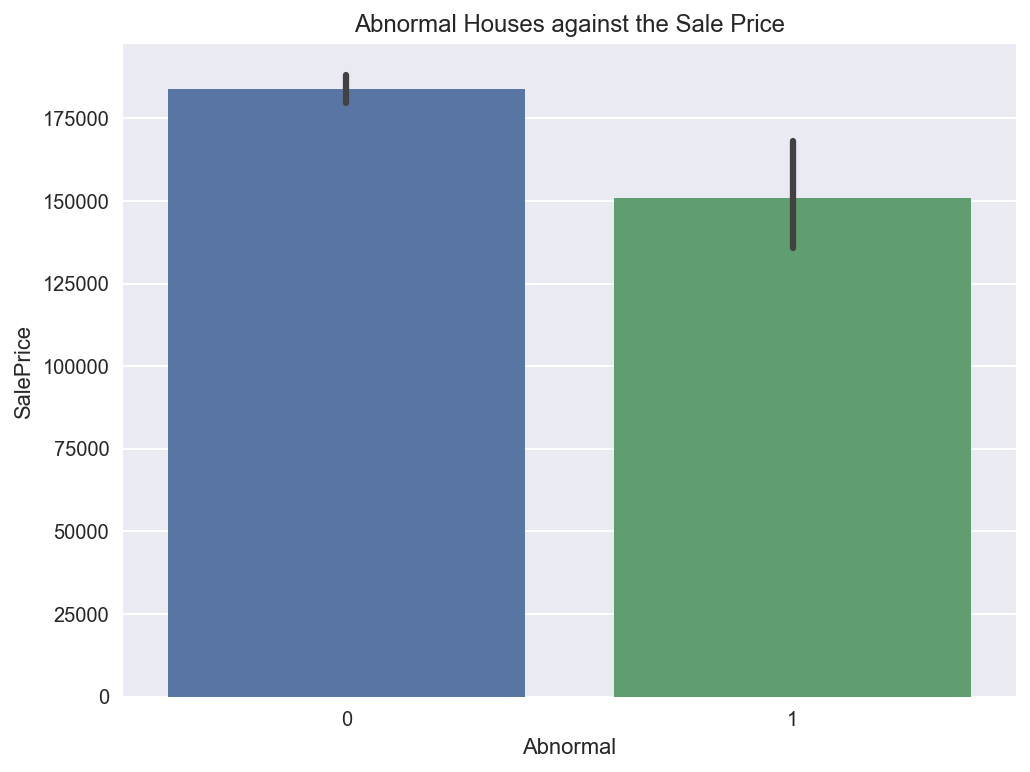

In [257]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x='Abnormal', y='SalePrice', data=data, ax = ax)
ax.set_title("Abnormal Houses against the Sale Price")

plt.show()

In [259]:
#find the yr sold against abnormal ones
abnormal_yrsold = data.groupby("YrSold")["Abnormal"].count()
print abnormal_yrsold

YrSold
2006    312
2007    328
2008    301
2009    336
2010    172
Name: Abnormal, dtype: int64


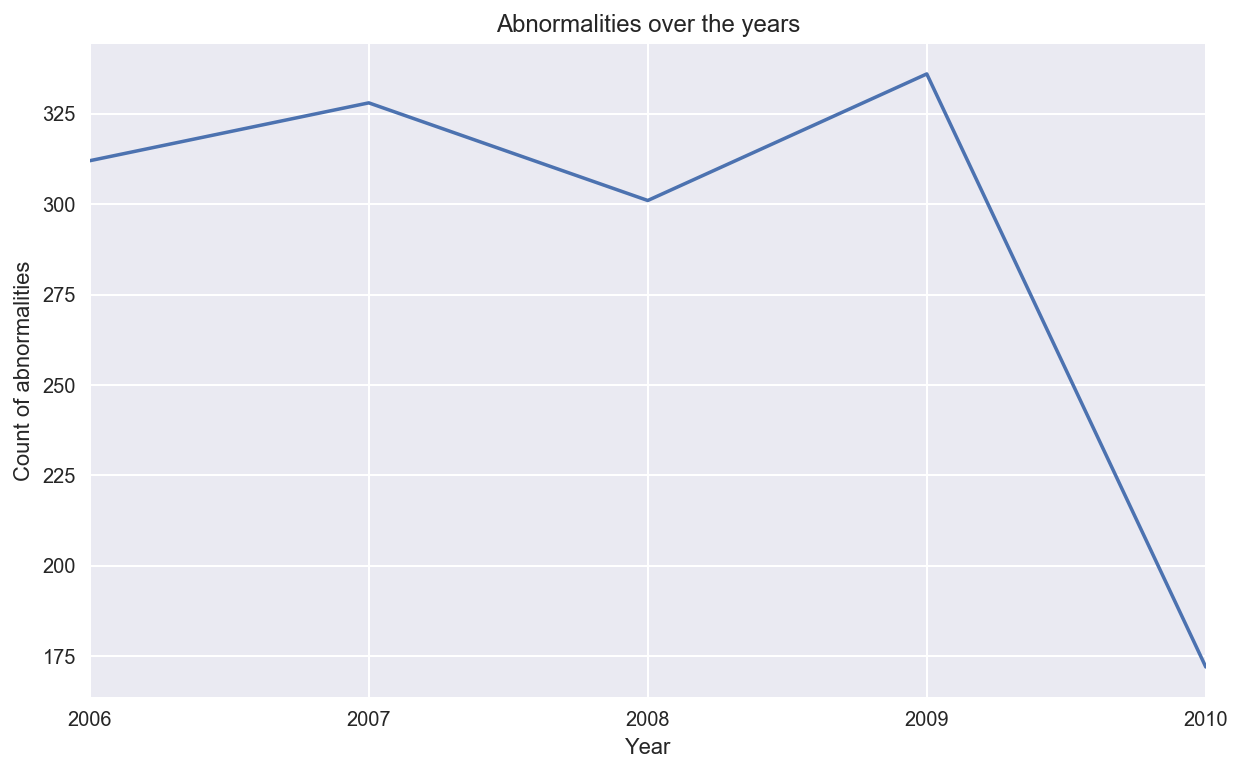

In [264]:
fig, ax = plt.subplots(figsize = (10,6))
sns.tsplot(abnormal_yrsold, time=abnormal_yrsold.index)
ax.set_title("Abnormalities over the years")
ax.set_xlabel("Year")
ax.set_ylabel("Count of abnormalities")
ax.set_xticks([2006, 2007, 2008, 2009, 2010])
plt.show()

In [301]:
X=data[['SalePrice','YrSold']]
Y=data['Abnormal']

In [302]:
import statsmodels.formula.api as sm
# Using OLS to check
model = sm.OLS(Y,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Abnormal   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     59.78
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.13e-25
Time:                        21:54:10   Log-Likelihood:                -32.028
No. Observations:                1449   AIC:                             68.06
Df Residuals:                    1447   BIC:                             78.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SalePrice  -3.264e-07   8.21e-08     -3.974      0.000   -4.88e-07   -1.65e-07
YrSold      6.253e-05   8.11e-06      7.713      0.000    4.66e-05    7.84e-05
==============================================================================
Omnibus:                     1017.159   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8832.694
Skew:                           3.434   Prob(JB):                         0.00
Kurtosis:                      12.956   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
#Create a new column
data["Sale_Age"] = data["YrSold"].map(lambda x: 2010 - x)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [306]:
X=data[['SalePrice','YrSold']]
Y=data['Abnormal']

In [307]:
# Using OLS to check
model = sm.OLS(Y,X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Abnormal   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     59.78
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.13e-25
Time:                        21:54:46   Log-Likelihood:                -32.028
No. Observations:                1449   AIC:                             68.06
Df Residuals:                    1447   BIC:                             78.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SalePrice  -3.264e-07   8.21e-08     -3.974      0.000   -4.88e-07   -1.65e-07
YrSold      6.253e-05   8.11e-06      7.713      0.000    4.66e-05    7.84e-05
==============================================================================
Omnibus:                     1017.159   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8832.694
Skew:                           3.434   Prob(JB):                         0.00
Kurtosis:                      12.956   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression()

#Standardising
ss = StandardScaler()
Xs = ss.fit_transform(X)

#Splits Dataset into test train 50:50 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.5)
model = lr.fit(X_train, y_train)

#Stores predictions and predicted probabilities: yhat, yhat_pp
yhat = model.predict(X_test)
yhat_pp = model.predict_proba(X_test)

In [309]:
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix
conmat = np.array(confusion_matrix(y_test, yhat, labels=[1,0]))

confusion = pd.DataFrame(conmat, index = ["Actual Abnormal", "Actual Normal"], columns = ["Predicted Abnormal",\
                                                                                          "Predicted Normal"])
confusion

,Predicted Abnormal,Predicted Normal
Actual Abnormal,0,49
Actual Normal,0,676


In [310]:
# Try again with other features
X=data[['SalePrice','OverallQual','OverallCond']]
Y=data['Abnormal']

In [314]:
# Logistic Regression
lr = LogisticRegression()

#Standardising
ss = StandardScaler()
Xs = ss.fit_transform(X)

#Splits Dataset into test train 50:50 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.5)
model = lr.fit(X_train, y_train)

#Stores predictions and predicted probabilities: yhat, yhat_pp
yhat = model.predict(X_test)
yhat_pp = model.predict_proba(X_test)

In [315]:
#Confusion Matrix
conmat = np.array(confusion_matrix(y_test, yhat, labels=[1,0]))

confusion = pd.DataFrame(conmat, index = ["Actual Abnormal", "Actual Normal"], columns = ["Predicted Abnormal",\
                                                                                          "Predicted Normal"])
confusion

,Predicted Abnormal,Predicted Normal
Actual Abnormal,0,49
Actual Normal,0,676
